<a href="https://colab.research.google.com/github/Mansi67/Global_Terrorism_Dataset_EDA/blob/main/Global_Terrorism_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Global Terrorism Database(GTD) EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**          - Mansi Srivastava


# **Project Summary -**

Our project revolved around a thorough analysis of the Global Terrorism Database (GTD), a vast record containing over 180,000 terrorist incidents spanning five decades. Our aim was to deeply understand the data, find trends, and spot patterns. We began by collecting, cleaning, and sorting the data meticulously, capturing all details about attacks, locations, methods used, who did it, the targets, and the human impact. We found that the types of attacks changed a lot over time. Sometimes there were many attacks, other times fewer. Certain areas like the Middle East, South Asia, and some parts of Africa had more attacks than others.

We looked at how attacks happened and who they targeted. Most attacks involved bombings or armed assaults, usually aimed at civilians, government buildings, or private property. Our study also focused on groups like ISIS, Taliban, and Boko Haram and many other major terror groups understanding how they operated globally and where they were most active.

This study showed us the need for better security measures, global teamwork, and adaptable anti-terrorism policies. It's crucial to be prepared and work together to face the changing threat of terrorism. Our findings are important for security plans, government decisions, and understanding risks. There's still a lot to explore in the GTD. We want to do more detailed studies, use predictions, and collaborate across different areas to make global security stronger against terrorism's ever-changing challenges.

# **GitHub Link -**

# **Problem Statement** : Analysing And Understanding Global Terrorism


The Global Terrorism Database (GTD) has loads of information about terrorist activities across many years worldwide. But, there's a need to dive deeper into this data. We want to do a detailed study, find out trends, and see patterns in how terrorism happens. Our aim is to understand when and where attacks occur most, the ways they happen, who they target, and how different terrorist groups operate. By using data analysis techniques, we hope to get useful insights. These insights will help make better security plans, create effective policies, and find ways to deal with the changing challenges of global terrorism.

#### **Define Your Business Objective?**

Our main goal from studying the Global Terrorism Database (GTD) is to make the world safer and better prepared to handle terrorism. By understanding the data, we want to improve security plans and make smarter decisions for dealing with terrorism. The aim is to create strong strategies and work together globally to keep communities and countries safe from the threats posed by terrorism.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("/content/Global_Terrorism_Data.csv", encoding = "ISO-8859-1")

<ipython-input-2-264307a984f3>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Global_Terrorism_Data.csv", encoding = "ISO-8859-1")


### Dataset First View

In [3]:
# Dataset First Look
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [4]:
df.tail(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print("There are {} rows and {} columns in the dataset".format(df.shape[0],df.shape[1]))



There are 181691 rows and 135 columns in the dataset


In [8]:
# Columns of the dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
# Stripping any unwanted spaces in column names
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [10]:
#Renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','city':'City',
                       'region_txt':'Region','attacktype1_txt':'Attack_Type','nkill':'Killed',
                       'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                   'weaptype1_txt':'Weapon_Type','motive':'Motive', 'property':'Property_Damages',
                   'propextent_txt':'PropDamageExtent'},inplace=True)

In [11]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['eventid','Year','Month','Day','Country','State','City','Region','latitude','longitude','Attack_Type','success','Killed',
               'Wounded','Target_Type','suicide','Weapon_Type','Group','Motive','Property_Damages',
         'PropDamageExtent']]

Now we are ready analyse the data!

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   Day               181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   State             181270 non-null  object 
 6   City              181257 non-null  object 
 7   Region            181691 non-null  object 
 8   latitude          177135 non-null  float64
 9   longitude         177134 non-null  float64
 10  specificity       181685 non-null  float64
 11  Attack_Type       181691 non-null  object 
 12  success           181691 non-null  int64  
 13  Killed            171378 non-null  float64
 14  Wounded           165380 non-null  float64
 15  extended          181691 non-null  int64  
 16  Target_Type       18

There are 6 float, 8 int and 11 object columns

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
print("Number of duplicated rows in the dataset: ", df.duplicated().sum())

Number of duplicated rows in the dataset:  0


There are zero duplicate rows in the dataset

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count

l=[]
for column in df.columns:
  if df[column].isnull().any():
    l.append(column)
print("Columns having null values:\n",l)

Columns having null values:
 ['State', 'City', 'latitude', 'longitude', 'specificity', 'Killed', 'Wounded', 'nperps', 'Motive', 'PropDamageExtent']


In [20]:
#Print the number of null values in each column
print("Number of missing values in columns:")
for column in l:
  print(f"{column}: {df[column].isnull().sum()}")


Number of missing values in columns:
State: 421
City: 434
latitude: 4556
longitude: 4557
specificity: 6
Killed: 10313
Wounded: 16311
nperps: 71115
Motive: 131130
PropDamageExtent: 117626


In [21]:
#Percentage of missing values in each column
data=round((1 - df.count() / len(df))*100,2)
df_missing = pd.DataFrame({'Column':data.index, '%Missing':data.values},index=None)

df_missing

,Column,%Missing
0,eventid,0.00
1,Year,0.00
2,Month,0.00
3,Day,0.00
4,Country,0.00
5,State,0.23
6,City,0.24
7,Region,0.00
8,latitude,2.51
9,longitude,2.51


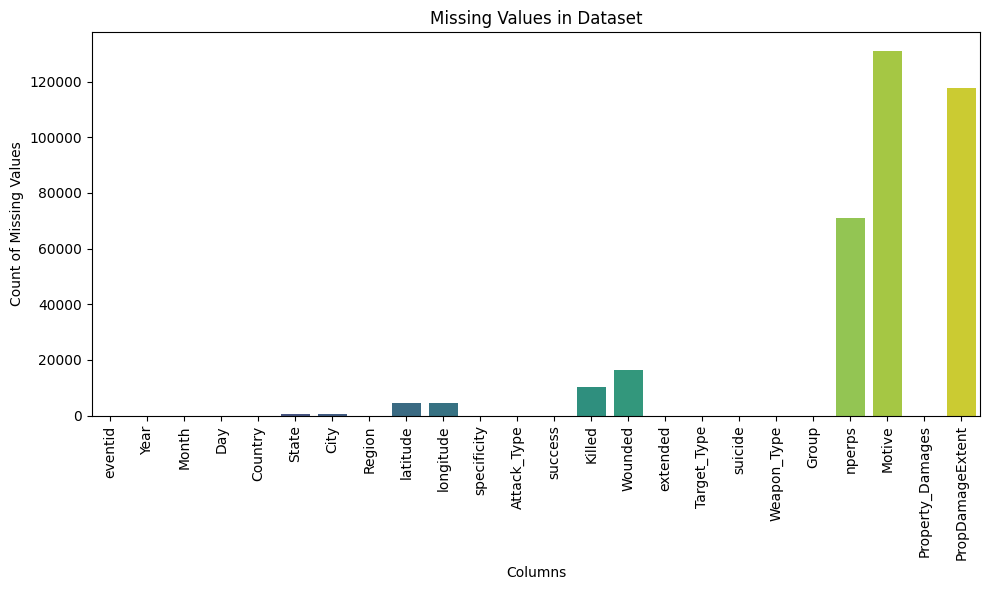

In [22]:
# Visualizing the missing values
# Create a DataFrame showing missing values
missing_values = df.isnull().sum()

# Plotting missing values using a bar plot in Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The Global Terrorism Database (GTD) is a comprehensive database maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland. It contains detailed information on terrorist attacks worldwide from 1970 through to recent years, covering a wide array of details about these incidents.

The GTD includes various data points for each terrorist attack, such as:

* Date, time, and location of the attack
* Attack type (e.g., bombing, armed assault)
* Weapons used
* Perpetrator information (if known)
* Casualties (number of fatalities and injuries)
* Target type (e.g., civilians, military, government)





## ***2. Understanding Your Variables***

In [27]:
# Dataset Columns
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'Country', 'State', 'City', 'Region',
       'latitude', 'longitude', 'specificity', 'Attack_Type', 'success',
       'Killed', 'Wounded', 'extended', 'Target_Type', 'suicide',
       'Weapon_Type', 'Group', 'nperps', 'Motive', 'Property_Damages',
       'PropDamageExtent'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,eventid,Year,Month,Day,latitude,longitude,specificity,success,Killed,Wounded,extended,suicide,nperps,Property_Damages
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,171378.000000,165380.000000,181691.000000,181691.000000,110576.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,1.451452,0.889598,2.403272,3.167668,0.045346,0.036507,-65.361154,-0.544556
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.995430,0.313391,11.545741,35.949392,0.208063,0.187549,216.536633,3.122889
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,5.000000,1.000000,1570.000000,8191.000000,1.000000,1.000000,25000.000000,1.000000


### Variables Description



1.  'eventid':
               • First 8 numbers – date recorded “yyyymmdd”.
               • Last 4 numbers – sequential case number for the given day (0001, 0002 etc). This is “0001” unless there is more than one case occurring on the same date.
2. 'Year', 'Month','Day':
            Show the year, month and day on which attack happened
3. 'Country':
            This column indicates the country in which attack happend
4. 'State' :
            This contains the name of state/province of the country in which attack happened
5. 'City':
            City in which attack happened
6. 'Region':
            The globe is divided in 12 regions. this column tells about the region in which attack occured
7. 'latitude', 'longitude':
            These fields record the latitude and longitude (based on WGS1984 standards) of the city in which the event
            occurred.
8. 'Attack_Type': Types of attack happened
                Assassination
                Hijacking
                Kidnapping
                Barricade Incident
                Bombing/Explosion
                Armed Assault
                Unarmed Assault
                Facility/Infrastructure Attack
                Unknown
9. 'success':
            1 = "Yes"  The incident was successful.
            0 = "No"   The incident was not successful
10. 'Killed','Wounded':
            Number of people killed and wounded in attacks.
11. 'Target_Type':
                BUSINESS
                GOVERNMENT(General)
                POLICE
                MILITARY
                ABORTION RELATED
                AIRPORTS & AIRCRAFTS
                GOVERNMENT(DIPLOMATIC)
                EDUCATIONAL INSTITUTION
                FOOD OR WATER SUPPLY
                JOURNALISTs & MEDIA
                MARITIME (INCLUDES PORTS AND MARITIME FACILITIES)
                NGO
                OTHER
                PRIVATE CITIZENS AND PROPERTY
                RELIGIOUS FIGURES/INSTITUTIONS
                TELECOMMUNICATION
                TERRORISTS/NON-STATE MILITIAS
                TOURISTS
                TRANSPORTATION (OTHER THAN AVIATION)
                UNKNOWN
                UTILITIES
                VIOLENT POLITICAL PARTIES
12. 'suicide':
              1 = "Yes" The incident was a suicide attack.
              0 = "No" There is no indication that the incident was a suicide attack.
13.'Weapon_Type':
                 BIOLOGICAL
                 CHEMICAL
                 RADIOLOGICAL
                 NUCLEAR
                 FIREARMS
                 EXPLOSIVES
                 FAKE WEAPONS
                 INCENDIARY
                 MELEE
                 VEHICLE
                 SABOTAGE EQUIPMENT
                 OTHER (A weapon that has been identified but does not fit into one of the above categories)
                 UNKNOWN
14. 'Group':
              Name of Terrorist Groups
15. 'Motive':
              When reports explicitly mention a specific motive for the attack, this motive is recorded in the
              “Motive” field.
16.'Property_Damages':
              1 = "Yes" The incident resulted in property damage.
              0 = "No" The incident did not result in property damage.
              -9 = "Unknown" It is unknown if the incident resulted in property damage.
17. 'PropDamageExtent':
                      Catastrophic (likely ≥ $1 billion)
                      Major (likely ≥ $1 million but < $1 billion)
                      Minor (likely < $1 million)
                      Unknown



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Chart - 1: **No. of Attacks Per Year**

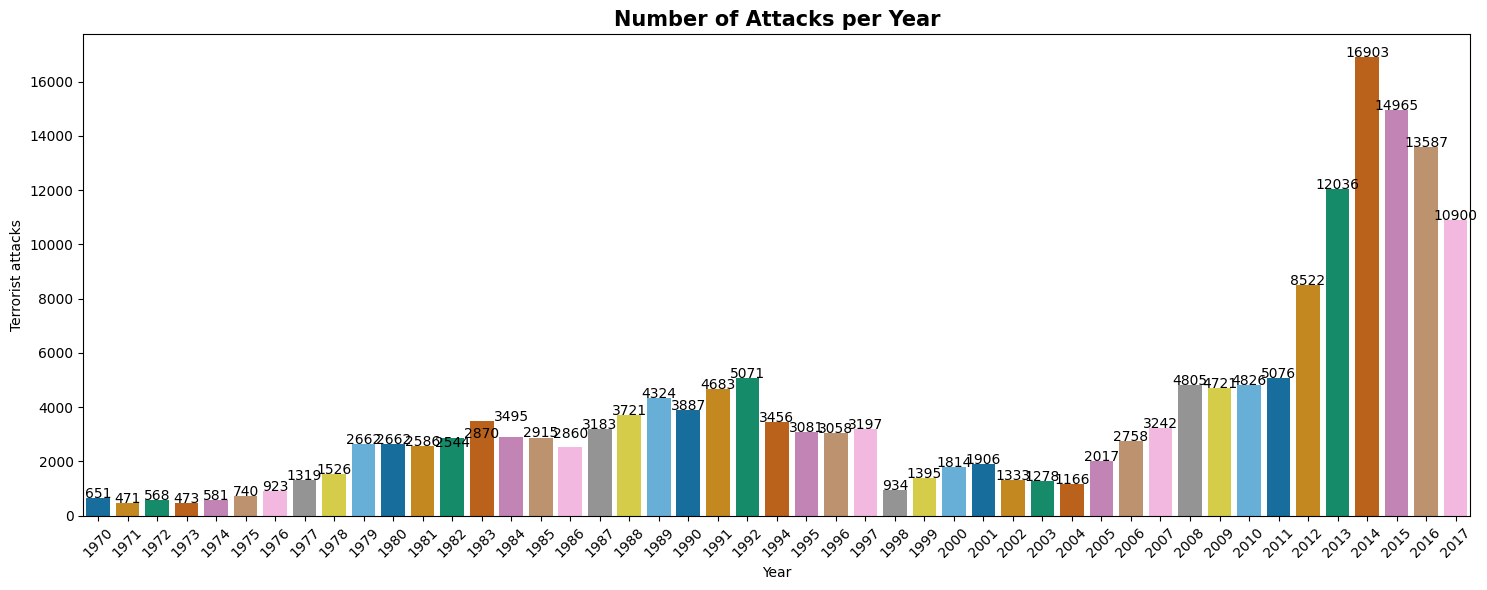

In [ ]:
#Finding unique years in the dataset
x_year = df['Year'].unique()
#Count of attacks per year
y_count_years = df['Year'].value_counts(dropna = False).sort_index()

#Plot the barplot
plt.figure(figsize = (15,6)) #Fig size
ax=sns.barplot(x = x_year,
           y = y_count_years,palette='colorblind')
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Terrorist attacks')
plt.title('Number of Attacks per Year',fontsize = 15, fontweight="bold")

#Show number of attacks on top of bars
for i, v in enumerate(y_count_years):
   ax.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot makes it easy to visualize the complex data at a glance. This plot is meant to understand the distribution of the total terrorist attacks in the last 05 decades.

##### 2. What is/are the insight(s) found from the chart?

 Analyzing terrorist attacks per year helps in understanding temporal trends and patterns. The graphs shows a linear increase in number of attacks as years progess. The number of attacks significantly dropped after 1997 and remained less for a couple of years up until 2007. There were a large number of attacks across the world between 2012 and 2017. The year 2014 was worst year in terms of peace.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights gained from analyzing terrorist attacks per year can inform strategic decision-making, risk management strategies, and preparedness plans. This, in turn, can contribute to a more resilient business environment and indirectly influence positive business outcomes.

# **Chart - 2 : Region Vs Attacks**

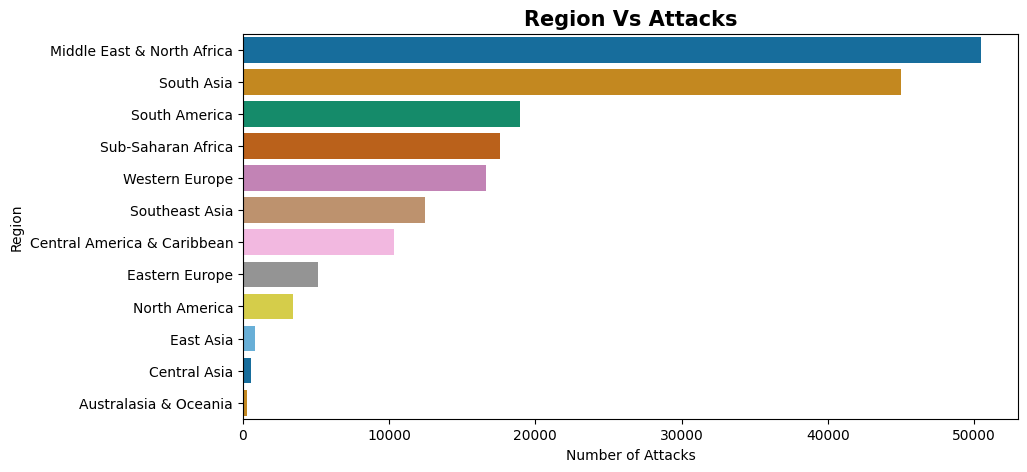

In [ ]:
#Group dataframe by region, count number of attacks, sort by region with most number of attacks
x=df.groupby("Region")['eventid'].count().sort_values(ascending=False)

#Plot the bargraph
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Region')
plt.xlabel('Number of Attacks')
plt.title('Region Vs Attacks',fontsize=15,fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

This chart identifies regions that are more prone to terrorist attacks. Understanding these trends helps in developing region-specific strategies to counter terrorism or address root causes contributing to conflict.

##### 2. What is/are the insight(s) found from the chart?

This chart divides the world in 12 regions.

Middle East & North African and South Asian regions experience highest number of terrorist attacks.
East Asia, Australasia & Oceania and Central Asian regions are rather peaceful regions.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 For global businesses and diplomatic relations, understanding regional attack patterns fosters a deeper comprehension of geopolitical risks. It influences decisions related to investment, trade, and international partnerships.

# **Chart 3 - Most Targeted Countries**

In [ ]:
pip install squarify

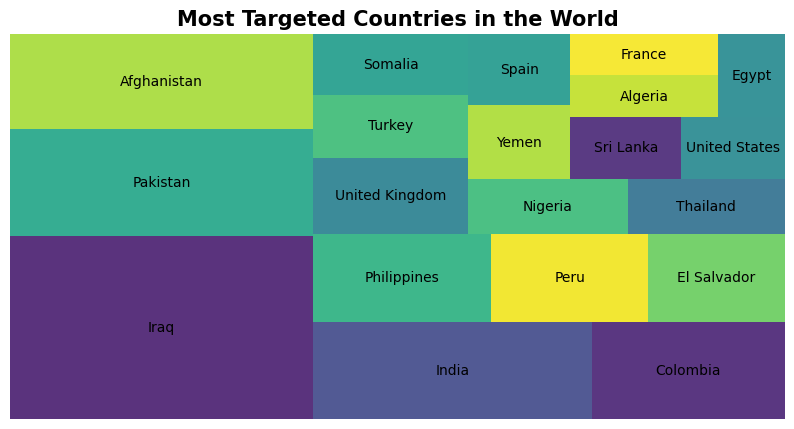

In [ ]:
import squarify
# 20 Most Targeted Countries
s=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:20]

# Plotting the treemap
plt.figure(figsize=(10, 5))
squarify.plot(sizes=s.values.tolist(), label=s.index.tolist(), alpha=0.9)
plt.axis('off')  # Remove axis
plt.title('Most Targeted Countries in the World', fontweight='bold', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

The visual representation in a treemap is intuitive and easily interpretable. Users can quickly identify larger rectangles (representing countries with higher incidents) and compare them to smaller rectangles (representing countries with fewer incidents).

##### 2. What is/are the insight(s) found from the chart?

Iraq, Pakistan, Afghanistan, India, Colombia are the countries where most attacks have occured till 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While insights into the most targeted countries provide valuable information for risk management and decision-making, they can also lead to negative growth or adverse effects due to operational disruptions, increased costs, reduced consumer confidence, and challenges in investment and market expansion.

# **Chart - 4 : Most Targeted Countries in Each Region**

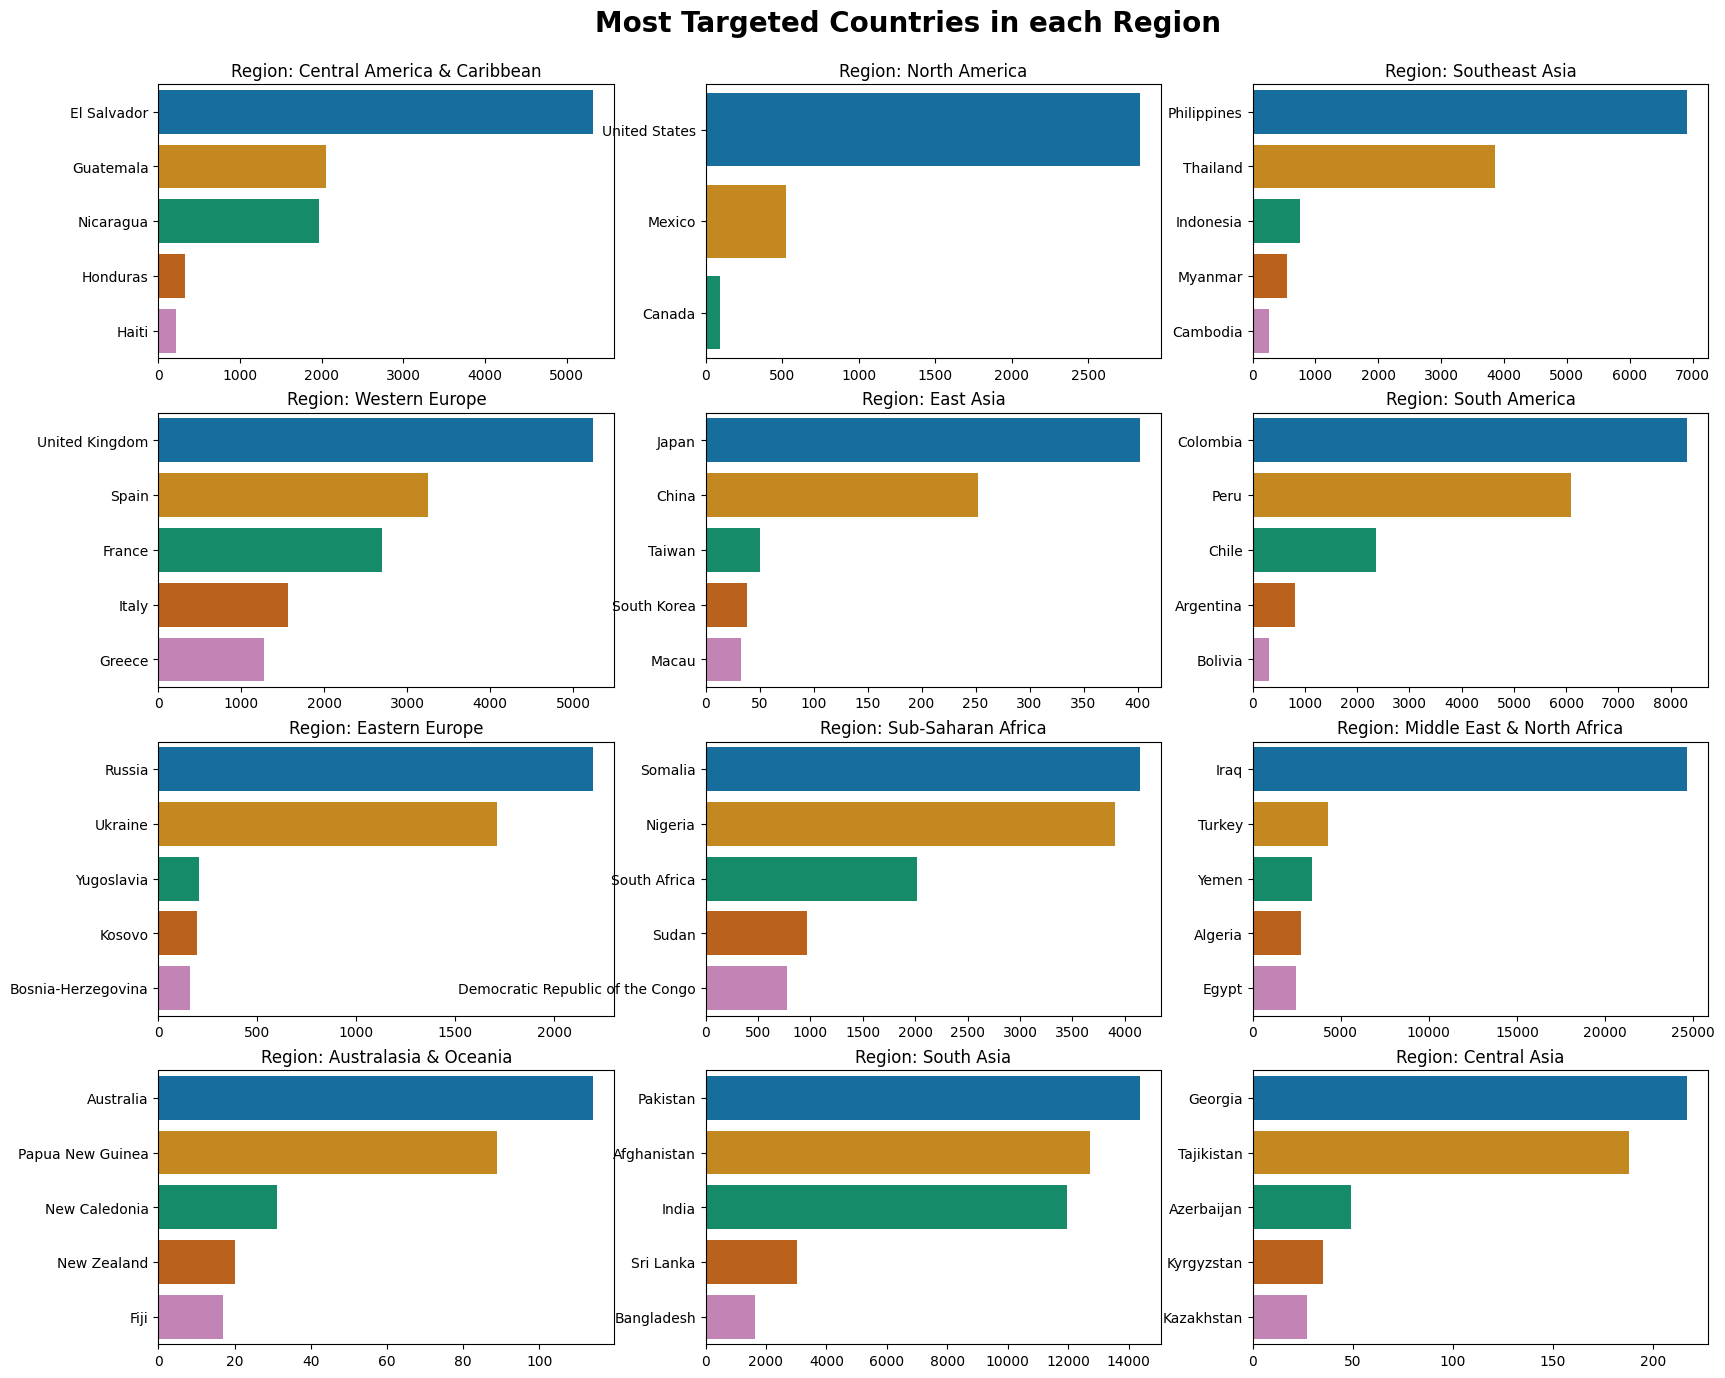

In [ ]:
# Create a 4x3 grid of subplots for graphs
fig, axes = plt.subplots(4, 3, figsize=(20,15))
# Adjust space of subplots
fig.subplots_adjust(top=0.95)
# Title of the main graph
plt.suptitle("Most Targeted Countries in each Region",  fontsize = 20, fontweight="bold",y=1)
i=0
j=0
flag=0
for value in df['Region'].unique():
  x=df[df['Region']==value].groupby('Country')['eventid'].count().sort_values(ascending=False)[0:5] # Top 5 most targeted countries by region

  # Plot subplots for each region
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Region: {}'.format(value),ylabel=None)
  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0

plt.show()



##### 1. Why did you pick the specific chart?

Highlighting the countries with the highest number of attacks in each region helps identify specific regional hotspots for terrorist activities. This information helps in prioritizing resources and counter-terrorism efforts in those areas.

##### 2. What is/are the insight(s) found from the chart?

Iraq has suffered most of the terrorist attacks in Middle East & North African region as well as in the whole world till 2017.
In South Asian region, Pakistan, Afghanistan and India tops the chart.
In Eastern Europe- Russia and Ukraine are the countries with most attacks.
In North America, USA tops and so on.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For multinational corporations and businesses, being associated with countries affected by terrorism may impact brand perception.
Businesses may face legal and compliance challenges due to the complex regulatory environments in high-risk regions, leading to additional costs and operational constraints.

# **Chart - 5 : Number of Attacks in Each Region Decadewise**

In [ ]:
#Function to calculate decade
def decade(year):
    if year>=1970 and year<1980:
       result='1970-1980'
    elif year>=1980 and year<1990:
       result= '1980-1990'
    elif year>=1990 and year<2000:
      result= '1990-2000'
    elif year>=2000 and year<2010:
       result= '2000-2010'
    else:
       result= '2010-2017'
    return result

In [ ]:
# Create a new column 'decade'
df['decade']=df['Year'].apply(decade)

In [ ]:
df.sample(2)

,eventid,Year,Month,Day,Country,State,City,Region,latitude,longitude,...,Target_Type,suicide,Weapon_Type,Weapon_Subtype,Group,nperps,Motive,Property_Damages,PropDamageExtent,decade
71474,200011280008,2000,11,28,Colombia,Bogota,Bogota,South America,4.667128,-74.106056,...,Business,0,Firearms,Unknown Gun Type,Revolutionary Armed Forces of Colombia (FARC),6.0,Revolutionary Armed Forces of Colombia (FARC) ...,0,NaN,2000-2010
1128,197201050002,1972,1,5,United States,New York,Buffalo,North America,42.885440,-78.878464,...,Government (General),0,Explosives,Unknown Explosive Type,Left-Wing Militants,-99.0,"To protest the establishment, specifically the...",-9,Unknown,1970-1980


In [ ]:
#df.groupby(["decade",'Region'])['eventid'].count()

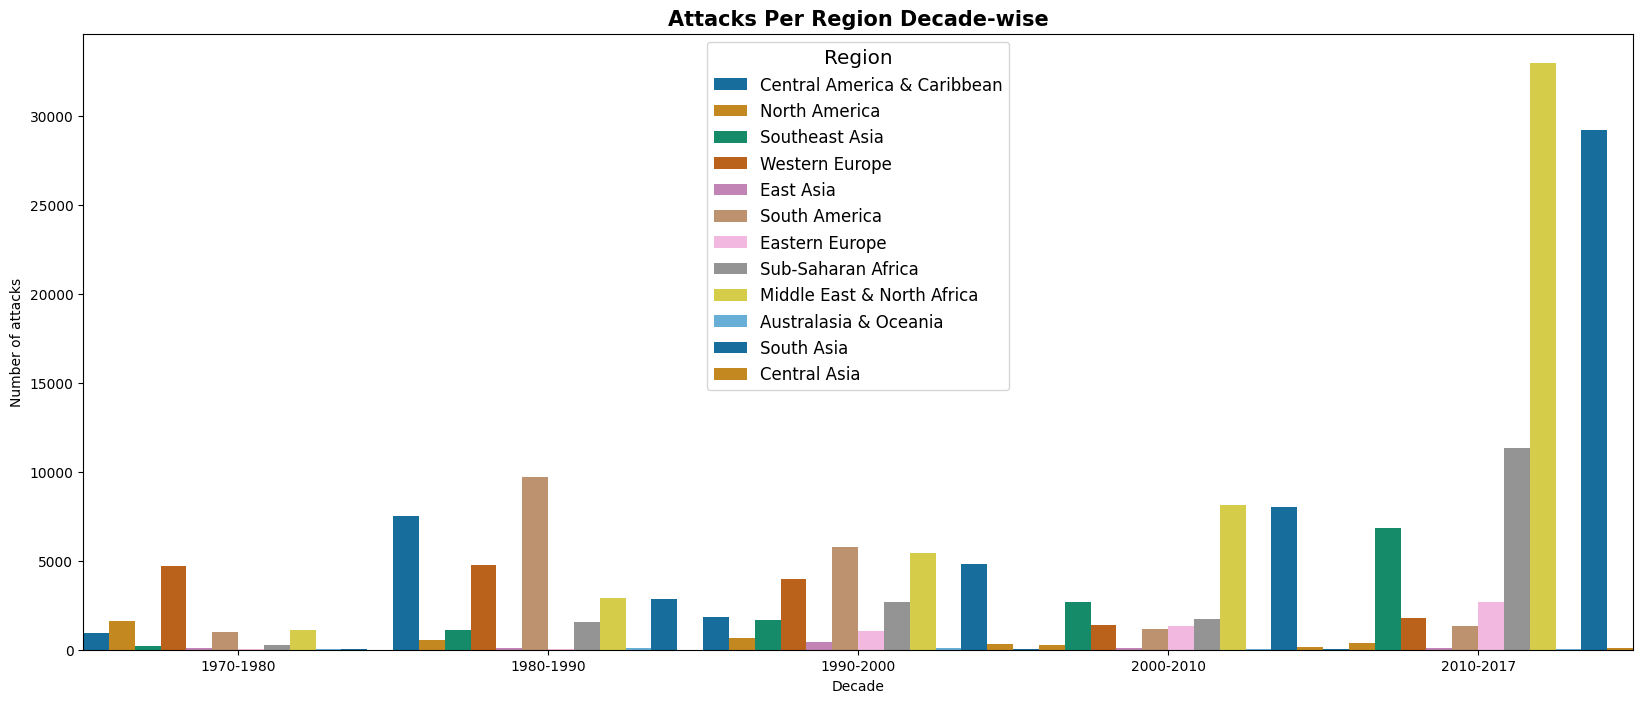

In [ ]:
plt.figure(figsize = (20,8)) # Set fig size

# Plot countplot with decade column divide bars by region
ax=sns.countplot(x='decade', data=df, hue='Region', width = 1, palette='colorblind')

plt.ylabel('Number of attacks')
plt.xlabel('Decade')

# Set title and legend
plt.title('Attacks Per Region Decade-wise', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center',
    fontsize='large',
    title='Region',
    title_fontsize='x-large')

plt.show()

##### 1. Why did you pick the specific chart?

This chart helps us to visualize how much terrorist attacks have progressed in each region in the last 5 decades. It aids in which regions were most affected in a specific decade.

##### 2. What is/are the insight(s) found from the chart?

*   During 1970-1980s, terrorist attacks were less than 5000 in every region. Western Europe was the most affected region.
*   During 1980-1990s, attacks increased in almost every region especially in Central America & Caribbean, South American and South Asian regions.
*  During 1990-2000s, Western Europe, South America, Middle East & North Africa were top targets of terrorist attacks
*   During 2000-2010s, Middle East and South Asia were the hotspots.
*   During 2010-2017, Sub Saharan Africa came to top after Middle East & North African and South Asian regions.

*   Central America & Caribbean region was mostly affected between 1970-2000 with most number of attacks in decade 1980-1990s.
*   North America has always seen less attacks.
*   Southeast Asia and Subsaharan African, although less attacks, but has a linear increase with most attacks between 2010-2017.
*   Middle East & North African region and South Asian regions are the most worrisome regions overall.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Regions with a persistent or increasing trend of attacks over decades might deter market entry or expansion. Businesses might avoid investing in or operating within these regions due to perceived higher risks, limiting growth opportunities.

# **Chart - 6: Suicide Attacks**

In [ ]:
# Top Countries with Most Suicide Terrorist attacks with their count of attacks
s=df[df['suicide']==1].groupby('Country')['eventid'].count().sort_values(ascending=False)[0:6]

# Grouping rest of the countries and calling them others and calculating the sum of number of suicide attacks
others=df[df['suicide']==1].groupby('Country')['eventid'].count().sort_values(ascending=False)[6:].sum()

In [ ]:
# Create a dataframe from above data
new_frame=pd.DataFrame({'Country':s.index,'SuicideAttacks':s.values}, index=None)
new_frame.loc[len(new_frame.index)] = ['Other', others]
new_frame

,Country,SuicideAttacks
0,Iraq,2602
1,Afghanistan,1228
2,Pakistan,511
3,Nigeria,389
4,Syria,344
5,Yemen,220
6,Other,1339


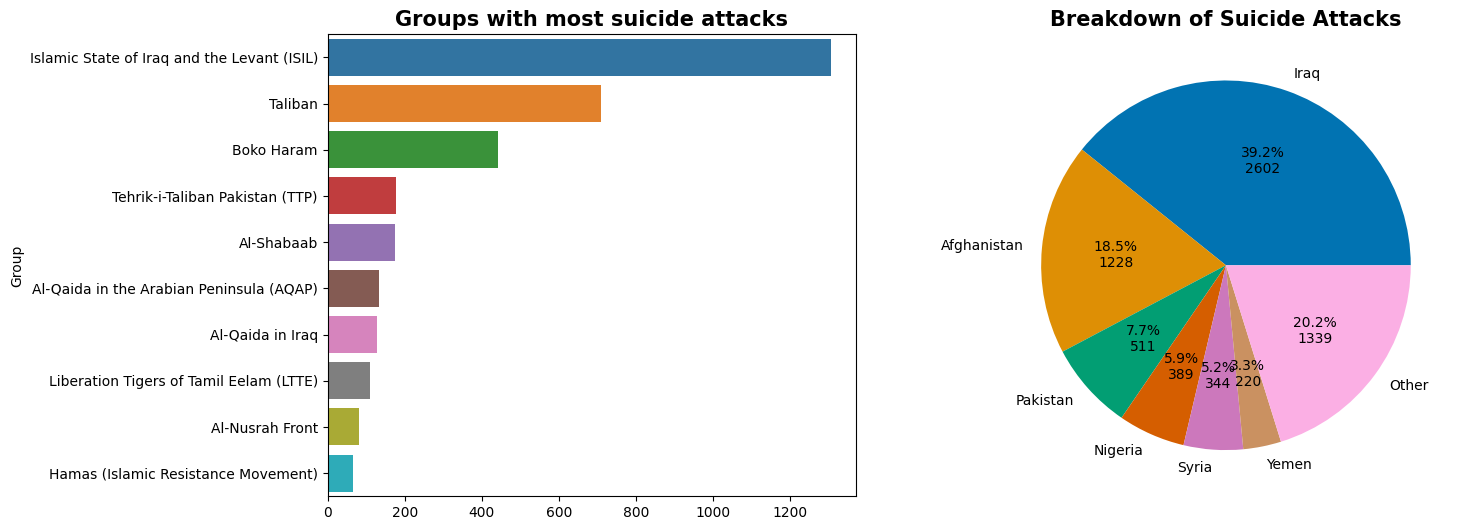

In [ ]:
# Plot 1x2 grid for plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6)) #ax1,ax2 refer to your two pies

# Set Palette Color for plot
palette_color = sns.color_palette('colorblind')

# Show % and number of attacks in pieplot
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

# # Plot countplot
# sns.countplot(data=df, x='suicide', ax=ax1, width=0.3)
# ax1.set_title("Suicide Attacks", fontsize=15, fontweight='bold')

#Groups with most number of suicide attacks
new=df[df['suicide']==1].groupby('Group')['eventid'].count().sort_values(ascending=False)[1:11]
#Plot bar
sns.barplot(y=new.index, x=new.values,width=0.8, orient='h', ax=ax1)
ax1.set_title("Groups with most suicide attacks", fontsize=15, fontweight='bold')

# Plot Pie
labels = new_frame['Country']
values = new_frame['SuicideAttacks']
total=sum(values)
ax2.pie(values,labels = labels,colors = palette_color,autopct = fmt)
ax2.set_title("Breakdown of Suicide Attacks", fontsize=15, fontweight='bold')



plt.show()



##### 1. Why did you pick the specific chart?

The barplot shows there are very less suicide attacks in terms of terrorist attacks. The pie chart shows breakdown of suicide attacks by countries. By this we can clearly see which country has most number of suicide attacks.

##### 2. What is/are the insight(s) found from the chart?

Iraq has the highest number of suicide attacks followed by Afghanistan and Pakistan.
Religious extremism or adherence to a particular ideology might drive individuals or groups to carry out suicide attacks.
Various extremist organizations, have been active in Iraq. These groups have used suicide attacks as a tactic to assert control, spread fear, and further their ideological agendas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no direct relationship between suicide attacks and businesses.

# **Chart - 7 : Number of People Killed and Wounded Per Decade**

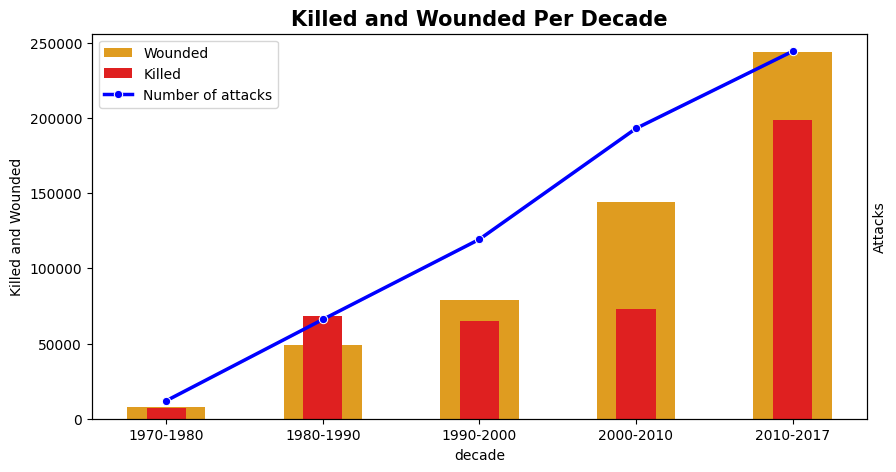

In [ ]:
#Group dataframe by decade and create a new dataframe with decade, sum  of killed and wounded per decade
new_frame=df.groupby('decade')[['Killed','Wounded']].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))
width=0.5
bar_plot1 = sns.barplot(x='decade', y='Wounded',width=width, data=new_frame, label="Wounded", color="orange", ax=ax1)
bar_plot2= sns.barplot(x='decade', y='Killed',width=0.5*width, data=new_frame,label="Killed", color="red",ax=ax1)

# Secondary y-axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(x='decade', y='eventid', data=df, marker='o', linewidth=2.5, color='blue', ax=ax2, label='Number of attacks') # Number of attacks over time
ax2.set_yticks([])
# Set labels and title
ax1.set_ylabel('Killed and Wounded')
ax2.set_ylabel('Attacks')
plt.xlabel('Decade')
plt.xticks(rotation = 0)
plt.title('Killed and Wounded Per Decade', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')

# Display legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()


##### 1. Why did you pick the specific chart?

This chart clubs Killed and Wounded people per decade in a single chart. It also shows the increase in number of attacks linearly.

##### 2. What is/are the insight(s) found from the chart?

There has been increase in the number of people wounded and killed in every decade. From 2010-2017, i.e, in 7 years, approx 200000 have died in terrorist attacks all over the globe and more than 200000 were wounded.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses suffer when they lose their employees and customers in attacks which in turn is bad for the world economy.

# **Chart - 8 : Number of Killed and Wounded per Region**

<function matplotlib.pyplot.show(close=None, block=None)>

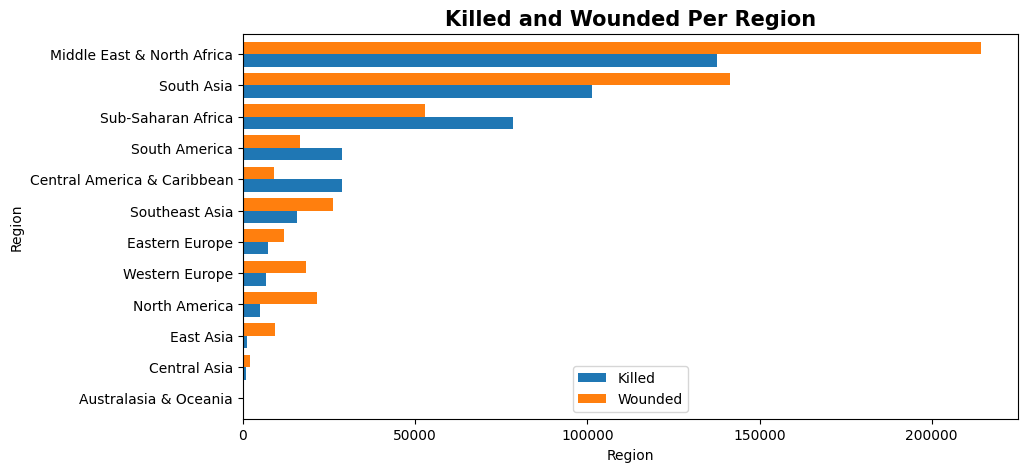

In [ ]:
# Group by Region and sum number of killed and wounded in a dataframe
new_frame=df.groupby('Region')[['Killed','Wounded']].sum().sort_values(['Killed','Wounded'],ascending=True).reset_index()
#Plot bar
new_frame.plot(x="Region", y=["Killed", "Wounded"], kind="barh", width=0.8,figsize = (10,5))
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.title('Total Killed and Wounded Per Region', fontsize = 15, fontweight="bold")
plt.legend(loc='lower center') #legend location
plt.show

##### 1. Why did you pick the specific chart?

In the context of the Global Terrorism Database (GTD), the comparison between regions and the number of killed and wounded individuals due to terrorism holds significance in understanding the impact and patterns of terrorist activities across different geographical areas.

##### 2. What is/are the insight(s) found from the chart?

Since Middle East and North Africa and South Asian regions have suffered most number of attacks, the number of killed and wounded is also the highest

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High-risk environments might pose challenges in recruiting and retaining talent. Employees might be reluctant to work in or relocate to areas perceived as unsafe, impacting staffing and expertise within the organization.

# **Chart - 9 : Type of Attack Vs Total Number of Attacks**

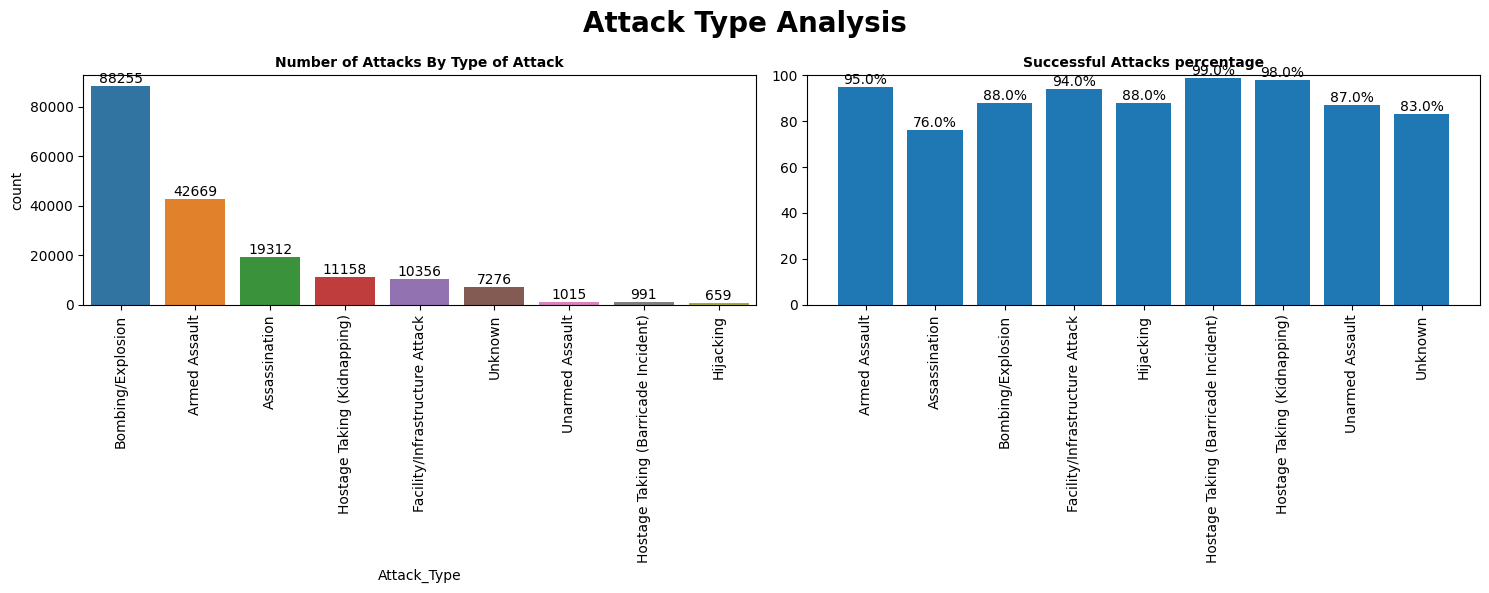

In [ ]:
# Plot 1x2 grid for plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
fig.suptitle('Attack Type Analysis', fontweight='bold', fontsize=20)
fig.subplots_adjust(top=0.95)


# Set Palette Color for plot
palette_color = sns.color_palette('colorblind')


sns.countplot(data=df,x='Attack_Type',order=df['Attack_Type'].value_counts()[:].index, ax=ax1)

ax1.set_title('Number of Attacks By Type of Attack', fontsize=10, fontweight='bold')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

# Displaying count values on top of the bars
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Plot Success Rate bar

s=df.groupby('Attack_Type')['eventid'].count()
r=df[df['success']==1].groupby('Attack_Type')['eventid'].count()
new=pd.DataFrame({'Attack_Type':s.index,'Total_Attacks':s.values,'Total_success_attacks':r.values})
new['%Success_attacks']=round((new['Total_success_attacks']/new['Total_Attacks'])*100)
# Plotting the bar graph
bars2=ax2.bar(new['Attack_Type'],new['%Success_attacks'], width=0.8 )
# Adding percentage labels on top of each bar
for bar, percent in zip(bars2, new['%Success_attacks']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{percent}%', ha='center', va='bottom')
# Setting y-axis limit to 100%
plt.ylim(0, 100)


ax2.set_title('Successful Attacks percentage',fontsize=10, fontweight='bold')
plt.sca(ax2)
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

 Different types of attacks have varying levels of impact in terms of casualties, property damage, and societal disruption. By correlating the type of attack with the number of attacks, one can assess the severity and frequency of these incidents.

##### 2. What is/are the insight(s) found from the chart?

* Most popular method of attacks is Bombing or Explosion. This type of attack often targets crowded areas or specific locations for maximum impact. It can be carried out with or without terrorist presence at the place of attack except for suicide bombing. There is often no specific human target involved but the main agenda is to make government and citizens terrified.

* Armed Assaults are also carried out alot. Armed assaults might stem from disputes over land, resources, or territorial control. It can be targeted to general populations as well as specific institutions.

* Assassinations involve the deliberate targeting and killing of specific individuals, often prominent figures, political leaders, activists, or public figures. It is a method to showcase power.

* Hijacking seldom occurs, the reason may be that a lot of security in involved.
* Almost all type of attacks are successful more than 70% of the times.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


 Pervasive terrorist activities might influence consumer behavior, causing reduced spending, changes in travel patterns, or reluctance to engage with certain businesses or industries perceived as high-risk.

# **Chart - 10 : Killed and Wounded by Type of Attack**

<Figure size 2000x800 with 0 Axes>

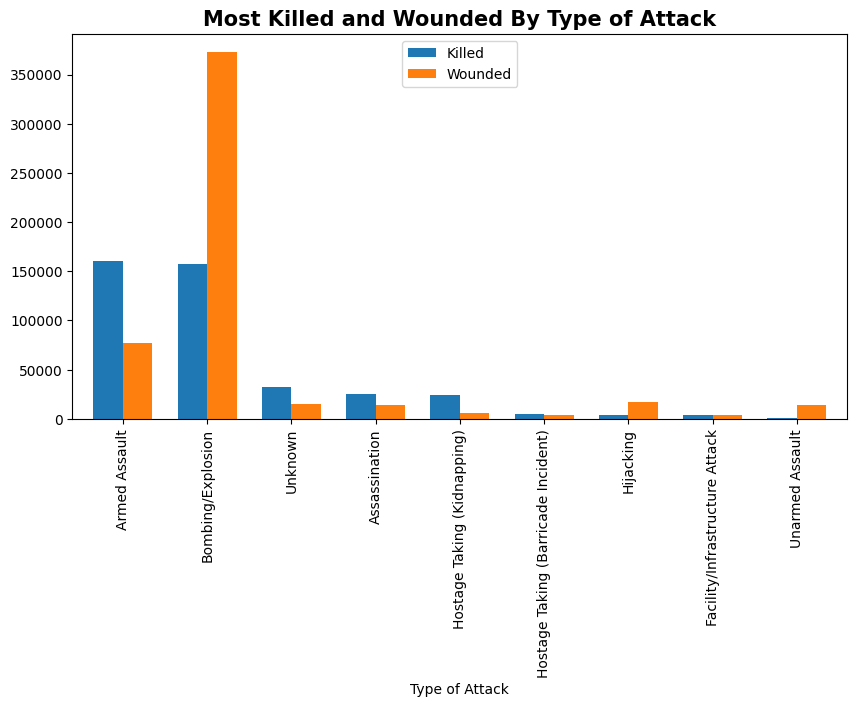

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (20,8))
#Create a dataframe by grouping Attack Type and sum killed and wounded
new_frame=df.groupby('Attack_Type')[['Killed','Wounded']].sum().sort_values(['Killed','Wounded'],ascending=False).reset_index()
#Plot bar
new_frame.plot(x="Attack_Type", y=["Killed", "Wounded"], kind="bar", width=0.7)
plt.xlabel('Type of Attack')
plt.xticks(rotation = 90)
plt.title('Most Killed and Wounded By Type of Attack', fontsize = 15, fontweight="bold")
plt.legend(loc='upper center')
plt.show()


##### 1. Why did you pick the specific chart?

 Examining the number of killed and wounded individuals by type of attack provides a critical perspective on the severity and implications of various attack methodologies.

##### 2. What is/are the insight(s) found from the chart?

Bombing and Armed Assaults have taken most number of lives when it comes to Terrorist attacks. Since these two are the most used methods of attacks therefore there is no surprise that they have caused most deaths and wounds.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

While security companies may benefit positively, retail companies might need to add extra measures or resources to strengthen security protocols without direct revenue impact.



# **Chart - 11 : Most Used Weapon Types**

In [ ]:
#Top 5 most used weapon type
s=df[df['Weapon_Type'] !='Unknown'].groupby('Weapon_Type')['eventid'].count().sort_values(ascending=False)[0:4]
#Group rest weapon types as others
others=df.groupby('Weapon_Type')['eventid'].count().sort_values(ascending=False)[4:].sum()

# creating new dataframe for Weapon and number of attacks
new_frame=pd.DataFrame({'Weapon': s.index, 'Attacks':s.values})
new_frame.loc[len(new_frame.index) ] = ['Other', others]
#new_frame

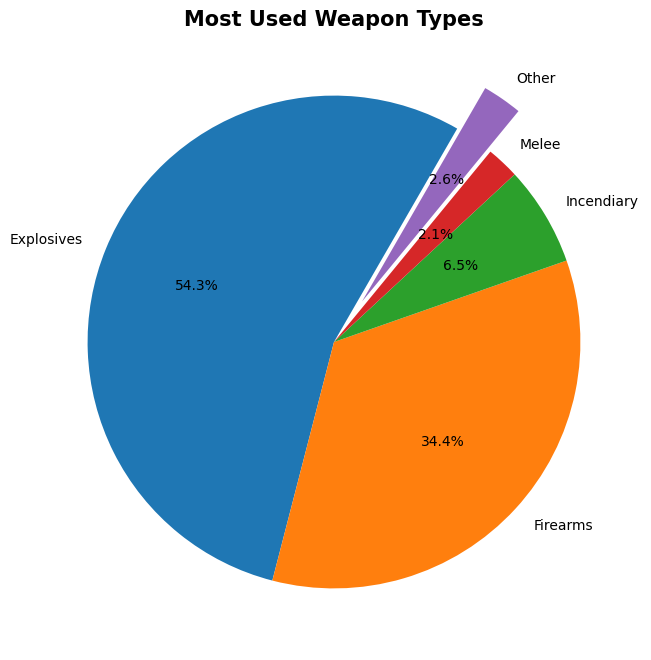

In [ ]:
# Plot Pie
labels = new_frame['Weapon']
values = new_frame['Attacks']

# Creating a pie chart
plt.figure(figsize=(12, 8))
explode = [0,0,0,0,0.2]  # Adjust the explode values as needed
plt.pie(values, labels=labels, autopct='%0.1f%%', startangle=60,explode=explode )
plt.title('Most Used Weapon Types', fontsize=15,fontweight='bold')
plt.show()


In [ ]:
#df.to_csv('new_df.csv', index=False)

##### 1. Why did you pick the specific chart?

Piechart is beneficial in identifying dominant weapon types easily.

##### 2. What is/are the insight(s) found from the chart?

More than half of the times, terrorist attacks are executed through the usage of Explosives.
Explosives and firearms are the two most used.
Explosives are of various types-suicide bombs, parcel bombs, booby traps, improvised explosives etc.
The "Firearms" includes guns and related weaponry for violent purposes by terrorist entities, individuals, criminal organizations, or militant groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By knowing the typr of weapons used security firms can innovate and offer effective countermeasures against specific weapon types and be well equipped.

# **Chart - 12 : Target of Terrorists**

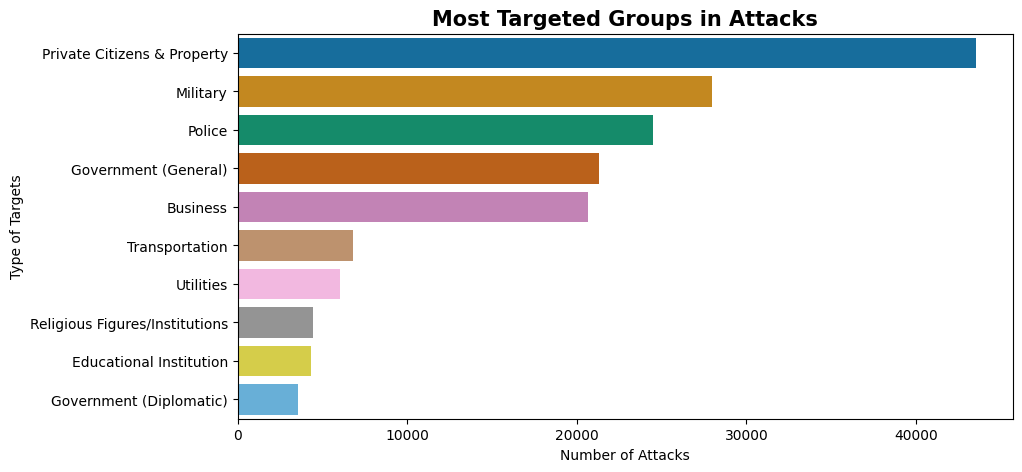

In [ ]:
# Top 10 most Targeted groups
x=df[df['Target_Type'] != 'Unknown'].groupby("Target_Type")['eventid'].count().sort_values(ascending=False)[0:10]
plt.figure(figsize = (10,5))
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Type of Targets')
plt.xlabel('Number of Attacks')
plt.title('Most Targeted Groups in Attacks', fontsize=15, fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

The targeted groups in terrorist attacks often reflect the objectives, ideologies, or strategic aims of the terrorist groups. Analyzing these trends helps in understanding the motives behind the attacks.

##### 2. What is/are the insight(s) found from the chart?

Private Citizens and Properties, Military, Government, Police and Businesses are the top targets.

# **Chart - 12 : Most Targeted Groups in Each Region**

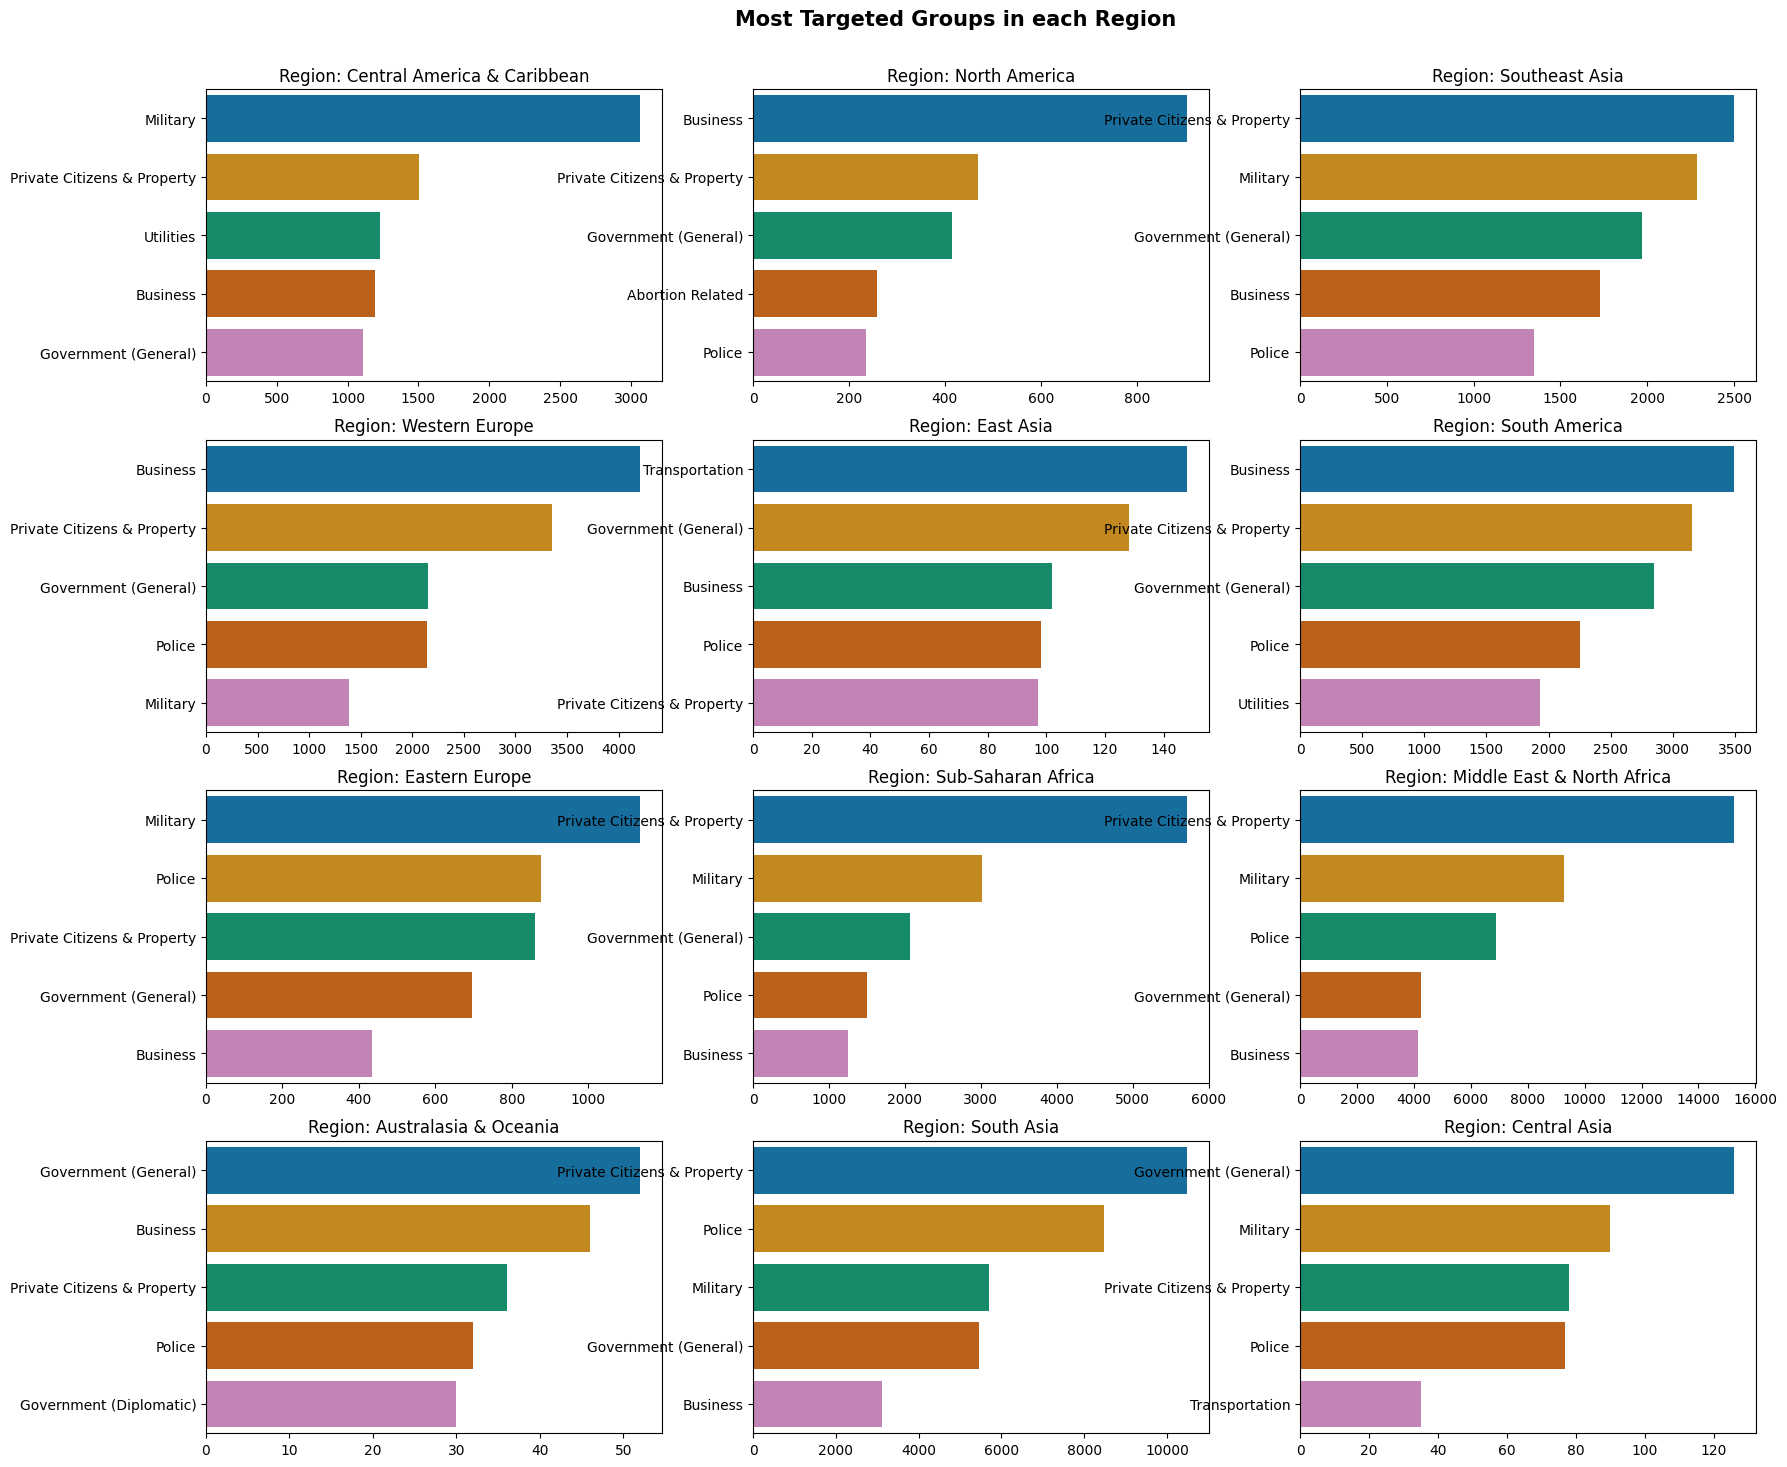

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(20,16))
fig.subplots_adjust(top=0.95)
plt.suptitle("Most Targeted Groups in each Region",  fontsize = 15, fontweight="bold",y=1)
i=0
j=0
flag=0
# Top 5 targeted groups in each region
for value in df['Region'].unique():
  x=df[df['Region']==value].groupby('Target_Type')['eventid'].count().sort_values(ascending=False)[0:5]
  # Plot graph
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='Region: {}'.format(value),ylabel=None)
  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0

plt.show()



##### 1. Why did you pick the specific chart?

Identifying the most targeted groups in specific regions helps in understanding the unique dynamics and regional patterns of terrorism.

##### 2. What is/are the insight(s) found from the chart?

Every region has its owns different sets of target groups which are mostly attacked by terrorists. It reflects regional tensions, conflicts, or societal divisions by showing which groups are frequently targeted in specific areas.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In-depth insights helps in making informed decisions about expanding into new markets while considering regional threats and vulnerabilities.

# **Chart - 14 : Terrorist Groups Vs Number of Attacks**

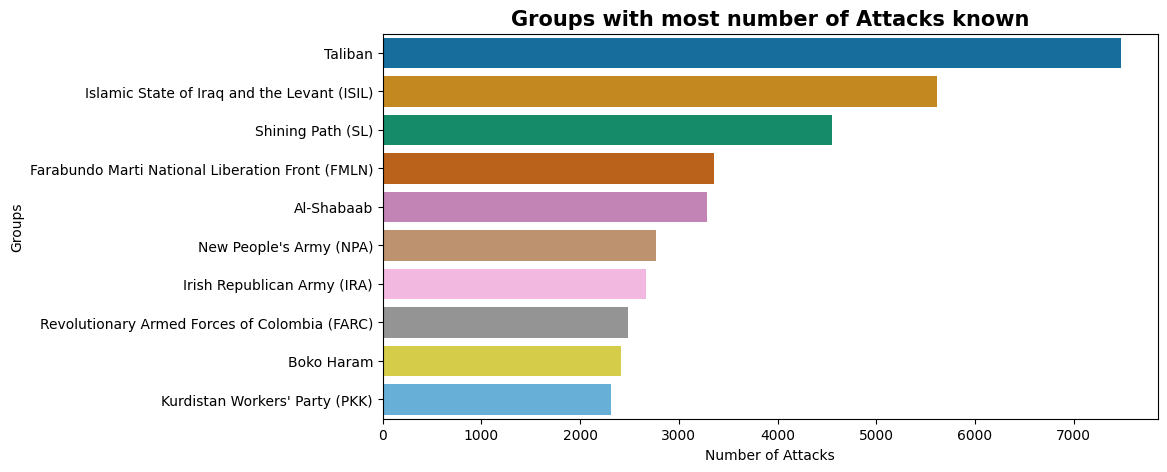

In [ ]:
# Top 10 terrorist groups
x=df.groupby("Group")['eventid'].count().sort_values(ascending=False)[1:11]
plt.figure(figsize = (10,5))
#Plot bargraph
ax=sns.barplot(x = x.values,
           y = x.index,palette='colorblind', orient='h')
plt.ylabel('Groups')
plt.xlabel('Number of Attacks')
plt.title('Groups with most number of Attacks known', fontsize=15, fontweight='bold')

plt.show()

##### 1. Why did you pick the specific chart?

It clearly highlights the top terrorist groups, making it easier to identify the most prevalent or active entities.

##### 2. What is/are the insight(s) found from the chart?

* Taliban is known to have executed most number of attacks.
* Taliban, ISIL, Al-Shabaab,Boko-Haram : These groups are rooted in extremist interpretations of Islam, seeking to establish strict Islamic governance based on their interpretations of Sharia law.
* The Farabundo Marti National Liberation Front (FMLN) is a political party in El Salvador that originated as a coalition of five leftist guerrilla groups during the Salvadoran Civil War (1980-1992). It transitioned from an armed insurgency to a political party after the peace accords in 1992.
* The Shining Path's agenda was rooted in Marxist-Leninist ideology, aiming to establish a communist state through armed revolution.
* The IRA (Irish Republican Army) has historically been considered a terrorist organization due to its involvement in various acts of violence, including bombings, assassinations, and attacks targeting civilians and security forces during the Northern Ireland conflict.
* The Revolutionary Armed Forces of Colombia (FARC) was a Marxist-Leninist guerrilla group and insurgency in Colombia that aimed to overthrow the government and establish a communist state.
* The PKK's status is complex, viewed both as a group fighting for Kurdish rights and as a designated terrorist organization due to its violent activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding historical conflicts and their resolutions aids in better risk assessment for business expansions or investments in formerly volatile regions.

 Regions transitioning from conflict may have uncertain political and social landscapes, creating instability that affects business growth.

# **Chart - 15: Most Targeted Countries and Major Terrorist Groups in them**

In [ ]:
#Most targeted countries
most_targeted_countries=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:10]
most_targeted_countries.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object', name='Country')

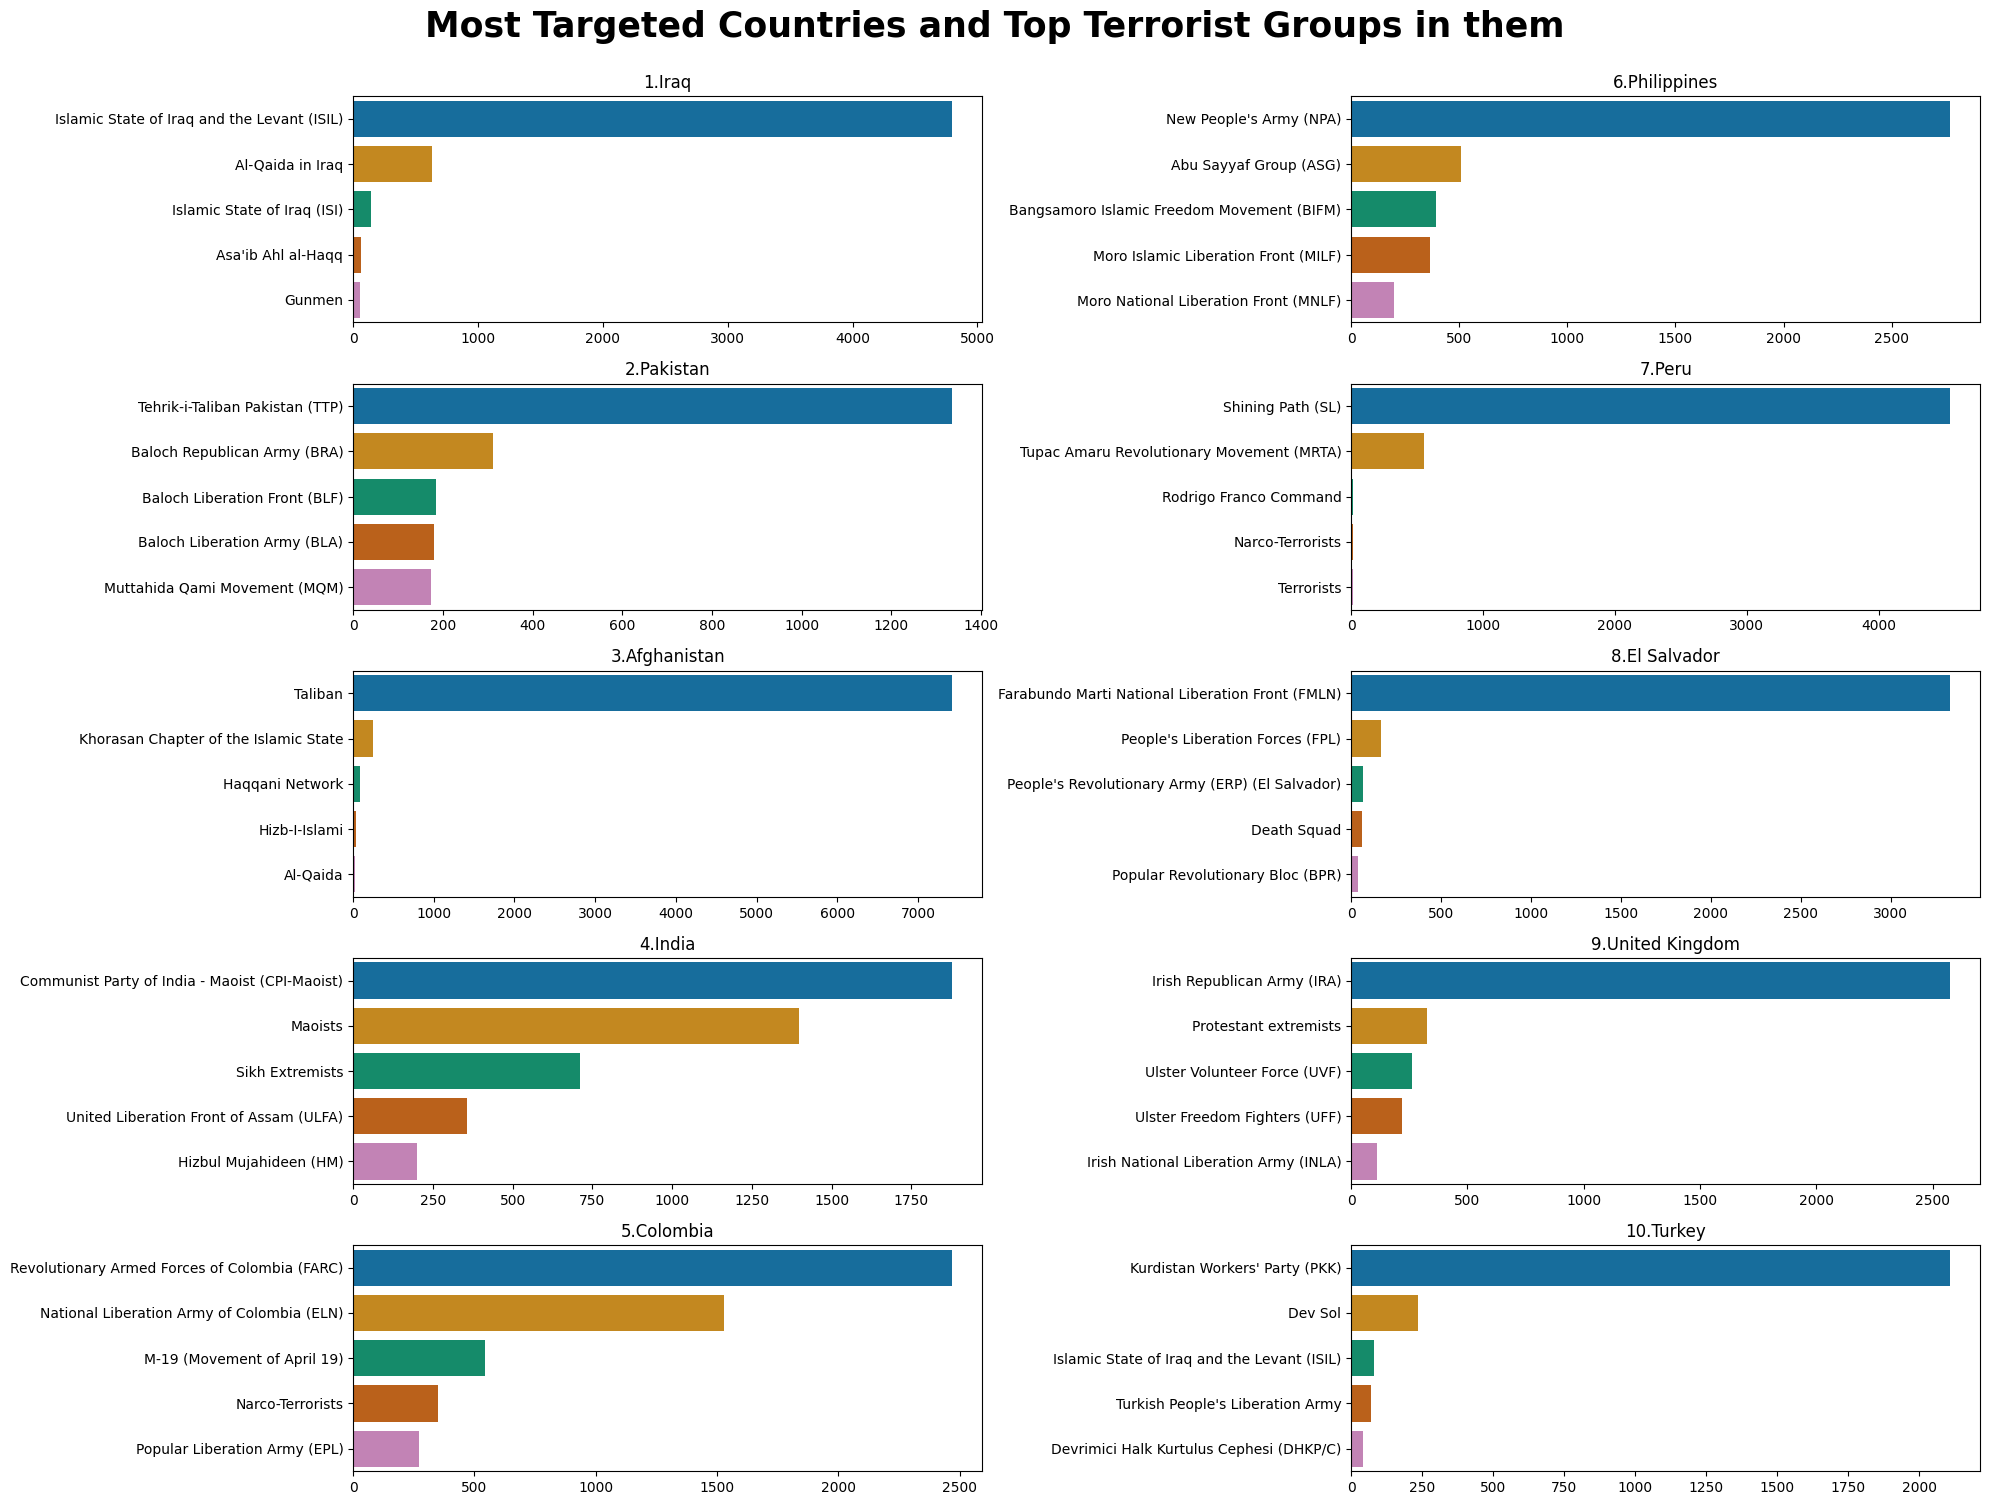

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(20,15))
fig.subplots_adjust(top=0.95)

plt.suptitle("Most Targeted Countries and Top Terrorist Groups in them",  fontsize = 25, fontweight="bold", y=1)
i=0
j=0
flag=0
for rank,value in enumerate(most_targeted_countries.index):
  # Top 5 terrorist groups by country
  x=df[(df['Country']==value) & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False)[0:5]
  ax=sns.barplot(ax=axes[i,j],x = x.values, y = x.index,palette='colorblind', orient='h', ).set(title='{}.{}'.format(str(rank+1),value),ylabel=None)
  i+=1
  flag+=1
  if i>4 and flag<10:
    i=0
    j=1
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart contains barplot for top 10 targeted countries in the world. Bar plot allows for easy comparison of the prevalent terrorist groups related to a specific country.

##### 2. What is/are the insight(s) found from the chart?

#Major Terror Groups in history
1. Iraq: ISIL is major terrorist group
2. Pakistan: Tehrik-i-Taliban
3. Afghanistan: Taliban
4. India: Maoists and CPI-Maoist
5. Colombia: Revolutionary Armed forces of Colombia
6. Phillipines:New Peoples party
7. Peru:Shining Path
8. El-Salvador: Farabundo Marti National Liberation Front
9. UK:Irish Republic Party
10. Turkey: Kurdistan Workers Party

This data is for overall major terrorist groups that has been there in these country over the period of 47 years that is from 1970-2017


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can prepare better for dangers like attacks by knowing which places are at higher risk and whether or not their product align to the ideology of that region.
Being linked to risky areas could make people think less of the business, which might hurt its image.

# **Chart - 16 : Terrorist Groups Vs Human Damages**

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x800 with 0 Axes>

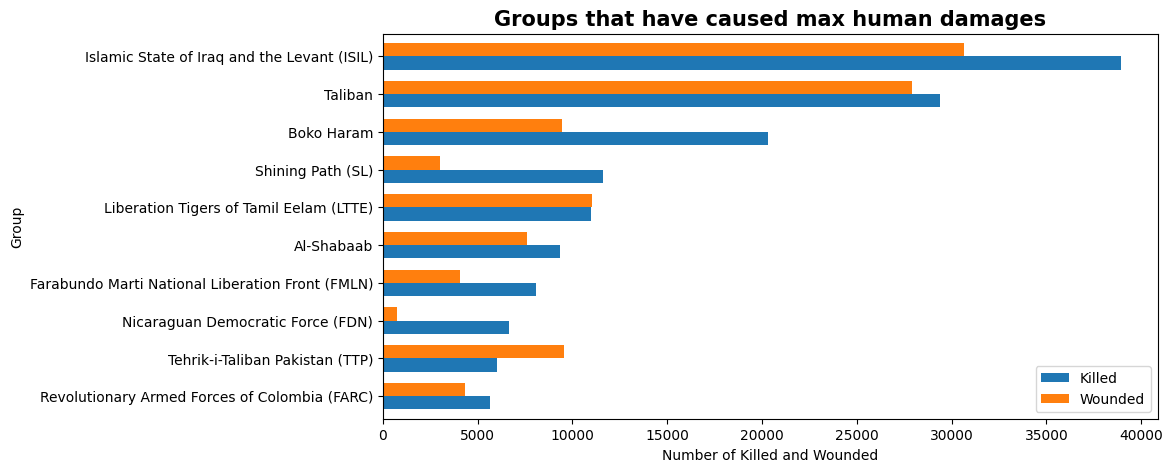

In [ ]:
plt.figure(figsize = (20,8))
#Killed and Wounded by terror groups
new_frame=df[df['Group']!='Unknown'].groupby('Group')[['Killed', 'Wounded']].sum().sort_values(by='Killed', ascending=True)[-10:].reset_index()
new_frame.plot(x="Group", y=["Killed", "Wounded"], kind="barh", width=0.7,)
plt.xlabel('Number of Killed and Wounded')
plt.xticks(rotation =0)
plt.title('Groups that have caused max human damages', fontsize = 15, fontweight="bold")
plt.legend(loc='lower right')
plt.show

##### 1. Why did you pick the specific chart?

Analyzing terrorist groups in relation to the number of killed and wounded can provide insights into the impact and severity of their activities.

###### 2. What is/are the insight(s) found from the chart?

The chart shows the top 10 terrorist group which have caused most number of casualities. ISIL tops the chart with 35000+ kills and 30000+ wounded followed by Taliban and Boko Haram


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Being aware of the ideologies of Terror groups and their extent in specific regions might be useful in setting up new businesses. Also,
Businesses armed with this knowledge can engage in targeted humanitarian efforts and CSR activities in affected areas. Participation in initiatives that aid affected communities can enhance the company's reputation and build positive relationships within these regions.

# **Chart - 17: The progression of Top Terror Groups in Most Targeted Countries of the World from 1970-2017**

In [ ]:
#most targeted countries
most_targeted_countries=df.groupby('Country')['eventid'].count().sort_values(ascending=False)[0:10]
most_targeted_countries.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object', name='Country')

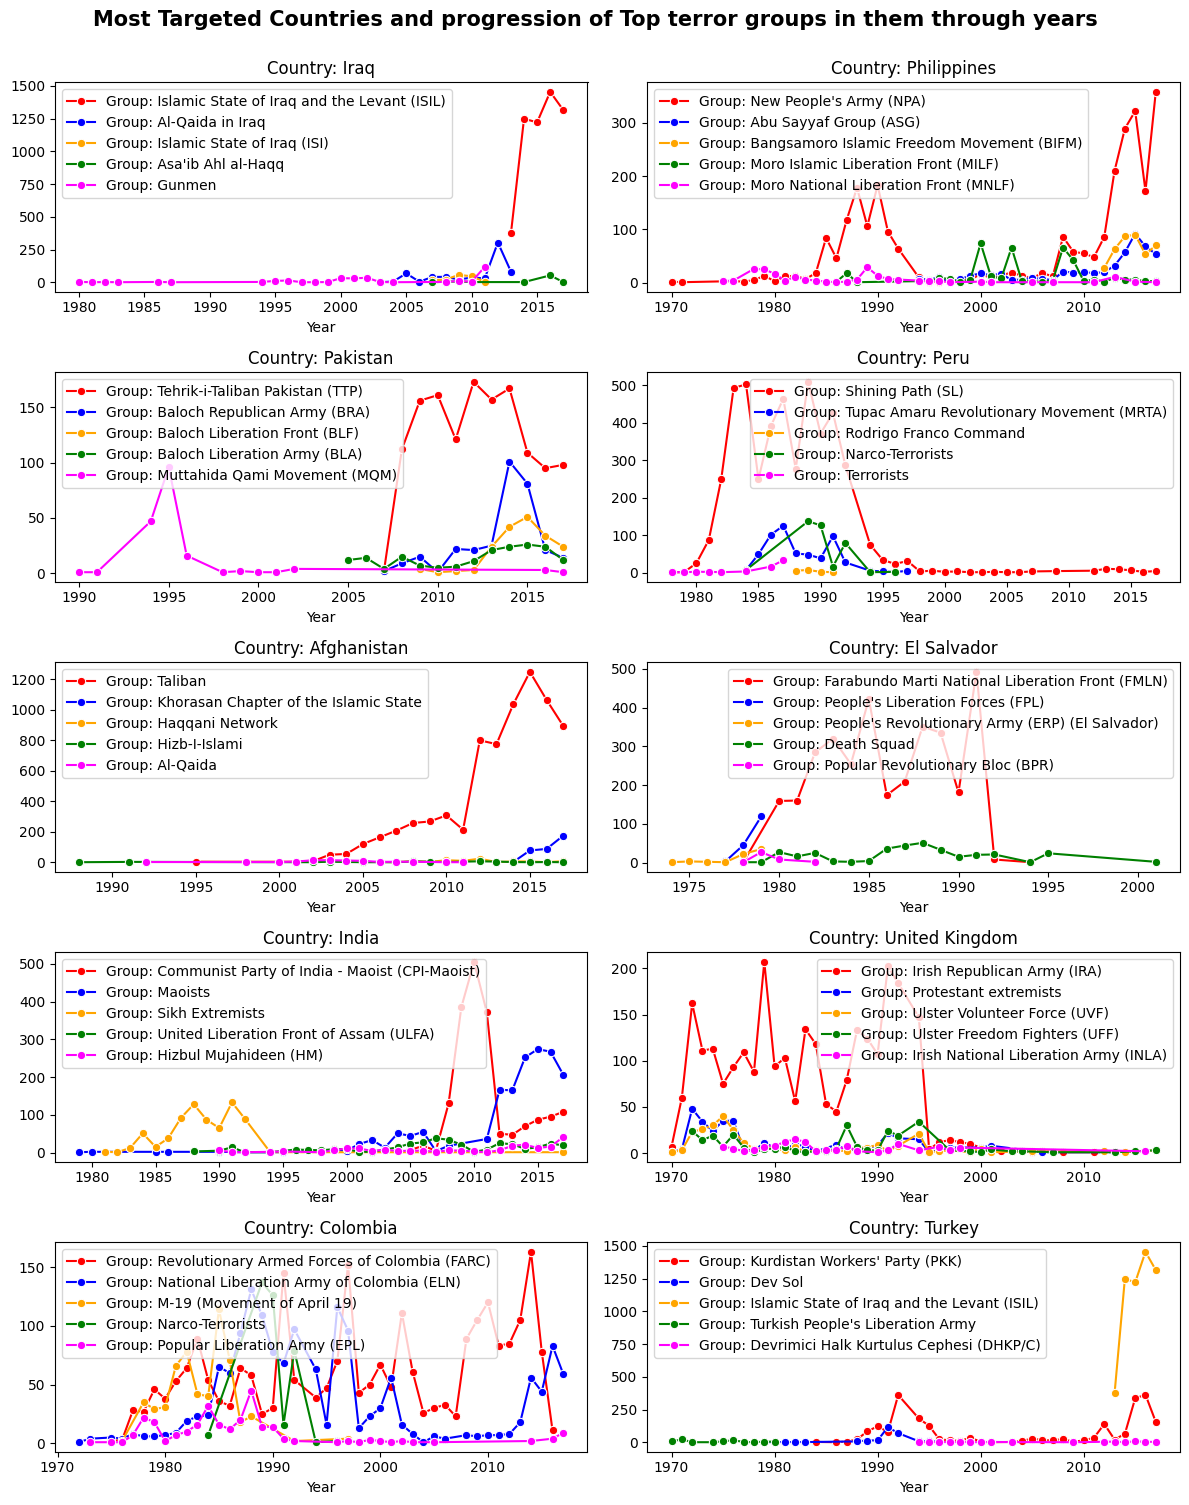

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(12,15))
fig.subplots_adjust(top=0.95)
# Title of main plot
plt.suptitle("Most Targeted Countries and progression of Top terror groups in them through years",  fontsize = 15, fontweight="bold",y=1)
i=0
j=0
flag=0

for value in most_targeted_countries.index:#Top 10 most targeted countries
  #Top 5 groups in each country
  groups=df[(df['Country']==value) & (df['Group'] !='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False).index[0:5]

  for c,group in enumerate(groups):
    colors=['red','blue','orange','green','magenta']
    #Number of attacks for each group through years
    s=df[df['Group']==group].groupby('Year')['eventid'].count()
    new_frame=pd.DataFrame({'Year':s.index,'Attacks':s.values})
    ax=sns.lineplot(data=new_frame,x='Year', y='Attacks', marker='o', linestyle='-', color=colors[c],
                    label='Group: {}'.format(group),ax=axes[i,j]).set(title='Country: {}'.format(value),ylabel=None)
  i+=1
  flag+=1
  if i>4 and flag<10:
    i=0
    j=1
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart illustrates which terror groups have the most significant influence or activities in most targeted countries and their impact over the years.

###### 2. What is/are the insight(s) found from the chart?

* In Iraq, ISIL started terror attacks around 2014 and became the most dangerous Terror organization of the world. Before that 'Al-Qaida in Iraq' was operating in Iraq.
* Pakistan is most affected by Tehrik-i-Taliban terror group. From early 1990s to 2000s Muttahida-Quami Movement (MQM) was the most active group. From 2000-2006 there were no major active groups. Unfortunately after 2006 several terror groups like TTP, BRA, BLA and BLF started emerging. Period 2012-2015 saw major number of attacks by TTP and others.
* Terrorism in Afghanistan became severe after 2002. Since 2003 Taliban is the deadliest terror group active in Agfhanistan. In recent years Khorasan Chapter of the Islamic State is also finding its space in the terrorism world.
* From mid 80s to mid 90s Sikh Extremists was the most active terror group in India. From 1995 till 2006, there were no major terrorist attacks in India. After 2006 India got badly affected by terrorism due to groups like CPI-Maoists and Maoists with its peak at 2010.
* From mid 70s till 2015 several terror groups were active in Colombia like FARC,ELN,M-19,Narco Terrorists and EPN. FARC executed maximum terror attacks throughout this period.
* Phillipines saw rise in terrorism after 1985 from NPA. Although NPA goes inactive from 1995 to 2007. After 2007 NPA once again started showing its violent side.
* The timeline for Shining Path started from 1980s which is the largest terror group in Peru. The database shows most of the  major terror groups in Peru died out after 1998.
* FMLN started executing terror attacks in El Salvador from 1978 and remained active till 1992. After 1992 very few active groups were left.
* The biggest terror group IRA in United Kingdom conducted attacks from 1970 till 2000 with peak in 1979. After 1998 UK has not seen any major terror groups.
* From 1970-80 Turkish Peoples Liberation Army was only major terror group in Turkey. Kurdistan Workers Party is the longest running terror organisation in Turkey which is still relevant. In recent years ISIL has emerged as the biggest terror group in Turkey

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In some cases, regions affected by terrorism might have untapped market potential due to limited competition. Businesses that can operate effectively in such environments by providing necessary goods or services could find unique opportunities for growth. However,  businesses might face challenges in establishing or expanding operations due to political instability or security concerns.

# **Chart - 18 : Most active Terrorist Groups in recent years**

In [29]:
pip install squarify

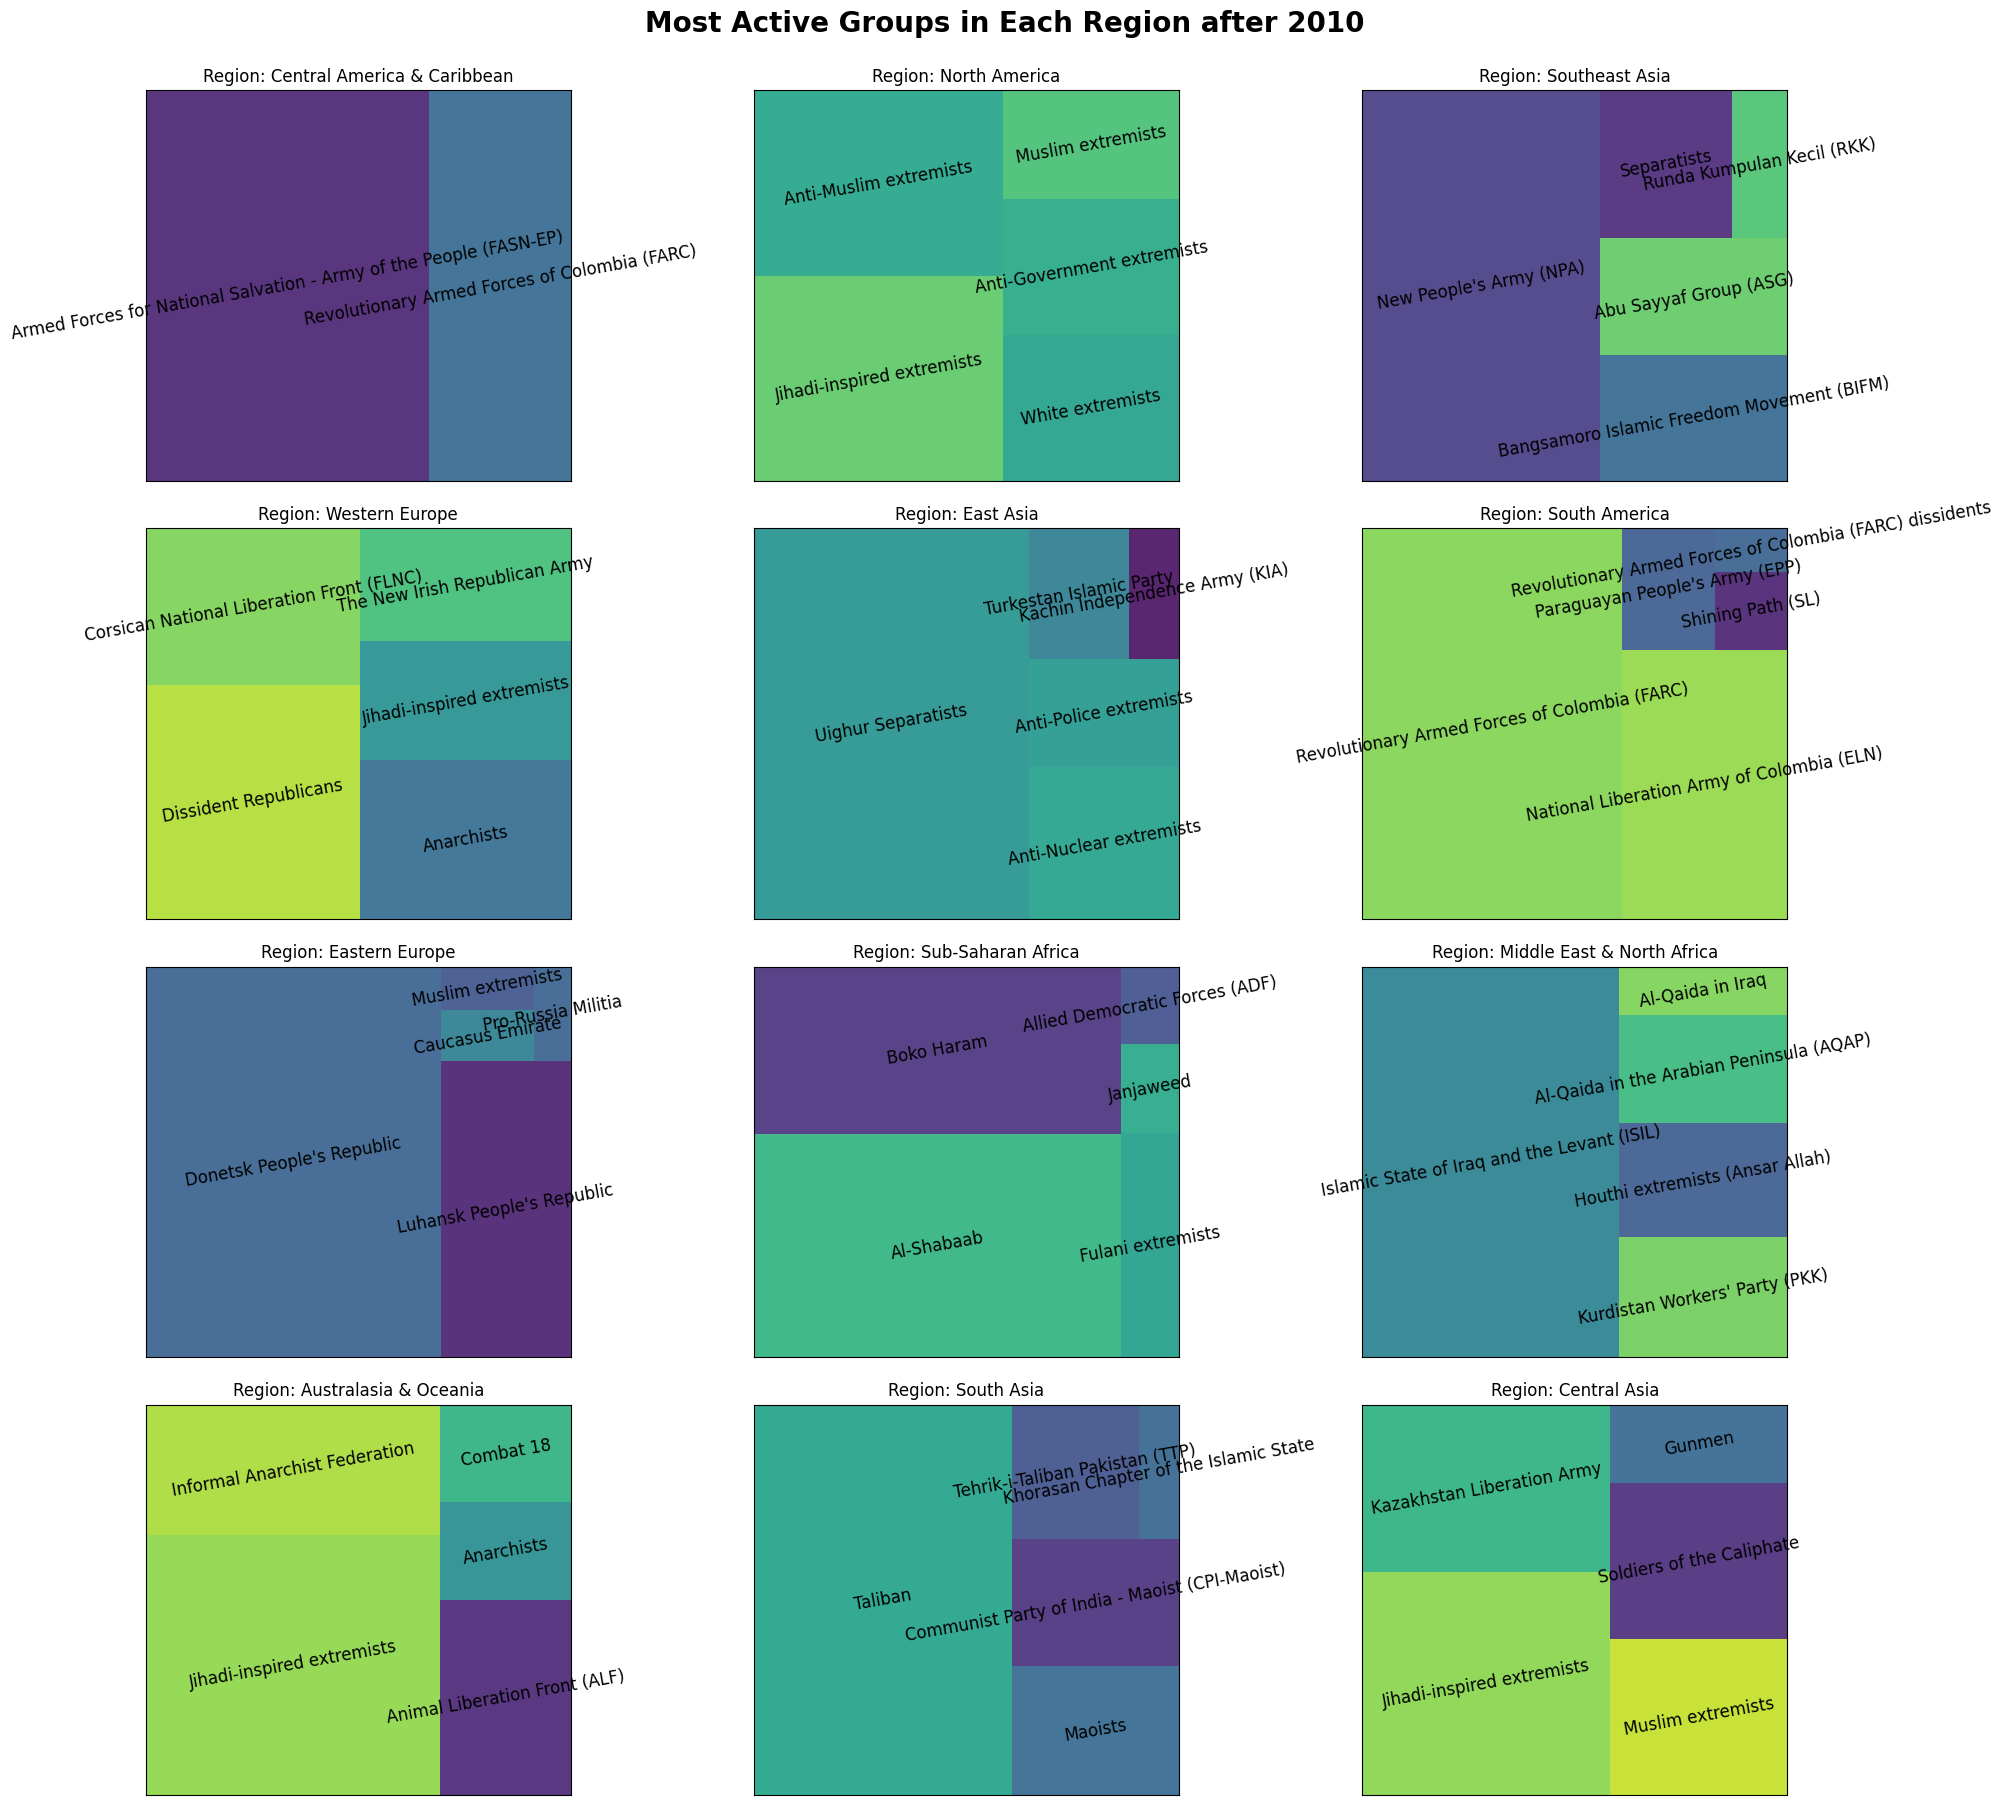

In [44]:
import squarify
import textwrap
fig, axes = plt.subplots(4, 3, figsize=(20,18))
fig.subplots_adjust(top=0.95)
plt.suptitle("Most Active Groups in Each Region after 2010",  fontsize = 20, fontweight="bold",y=1)
i=0
j=0
flag=0
for value in df['Region'].unique():
  # Most active groups in each reggion 2010 onwards
  x=df[(df['Year']>=2010) & (df['Region']==value) & (df['Group']!='Unknown')].groupby('Group')['eventid'].count().sort_values(ascending=False)[0:5]
  # Plot Treemaps
  sizes=x.values.tolist()
  labels=x.index.tolist()
  ax=squarify.plot(sizes=sizes, label=labels, alpha=.9, ax=axes[i,j], text_kwargs={'fontsize': 12, 'rotation': 10}).set(title='Region: {}'.format(value),ylabel=None,xticks=[],yticks=[])
  # Manually adjust label text
  # for l, label in enumerate(labels):
  #   plt.text(x=sizes[l] / 2, y=l * 5, s=label, ha='center', va='center', wrap=True)  # Adjust position and wrap

  # Customize label sizes (adjust the 'fontsize' parameter)
  #plt.rcParams['font.size'] = 10# Set default font size

  j+=1
  flag+=1
  if j>2 and flag<12:
    i+=1
    j=0
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

In order to understand the present conditions of terrorism around the globe, this chart is meant to visualize the most active groups in different regions of the world.

###### 2. What is/are the insight(s) found from the chart?

* In Central America & Caribbean, FASN-EP is the most active group in recent years followed by FARC.
* The two dominant terror groups in Western Europe are Dissident Republicans and FLNC. The other active organizations include Jihadi-Inspired Extremists, Anarchists, The New Irish Republic Army and Muslim Extremists.
* Almost 2/3rd terror attacks conducted in Eastern Europe after 2010 were executed by Donetsk Peoples Republic.
* Australasia & Oceania are most affected by Jihadi Inspired Extremists  followed by Informal Anarchist Federation after 2010.
* The 5 major terror groups in North America in recent years are extremists groups like Anti-Muslims, Jihadi-Inspired, Muslims, Anti Government and White Extremists.
* East Asia most active terror group is Uighur Separatists which has almost 60% share in total number of attacks after 2010.
* New Peoples Army in Southeast Asia is still active as the biggest terror group followed by RKK, ASG and BIFM.
* FARC is not just dominating Central America & Caribbean but also is highly active in South America.
* More than 80% terror attacks in Sub Saharan Africa are executed by two major groups Al-Shabaab and Boko Haram.
* South Asia facing terrorism by groups like Taliban, TTP, CPI-Maoists and Maoists. Among them Taliban tops the chart.
* Middle East & North Africa is most tormented by the attacks conducted by ISIL followed by AQAP, Houthi extremists, PKK and Al-Qaida in recent years.
* Jihadi-Inspired Extremists and Kazakhstan Liberation Army dominates the terrorism in Central Asia after 2010.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into the regions affected by active terrorist groups enable businesses to diversify or alter supply chains. They might choose alternative suppliers or logistics routes to mitigate potential disruptions caused by attacks or instability. However, heightened terrorism threats might compel businesses to invest more in security measures and insurance coverage, resulting in increased operational expenses. These additional costs can impact profitability and hinder growth.

# **Chart-19 : Most Targeted Countries in recent years**

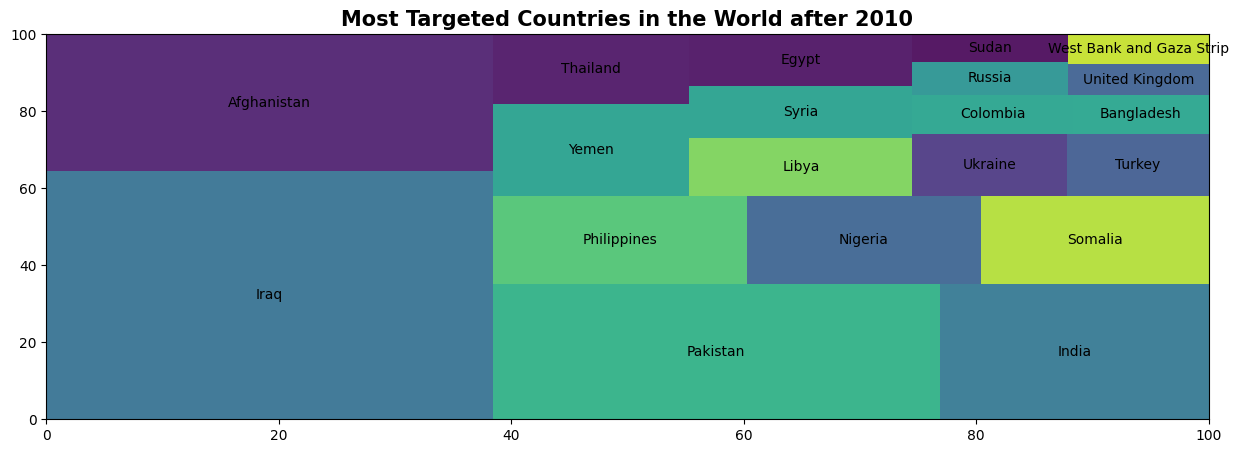

In [52]:
import squarify
# 20 Most Targeted Countries
s=df[df['Year']>=2010].groupby('Country')['eventid'].count().sort_values(ascending=False)[0:20]

# Plotting the treemap
plt.figure(figsize=(15, 5))
squarify.plot(sizes=s.values.tolist(), label=s.index.tolist(), alpha=0.9)
# plt.axis('off')  # Remove axis
plt.title('Most Targeted Countries in the World after 2010', fontweight='bold', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

 Treemaps use area size to represent values, making it easy to visually compare the frequency or intensity of attacks across multiple countries.

###### 2. What is/are the insight(s) found from the chart?

It is quite obvious from the graph that countries majorly affected by terrorism in recent years are Iraq, Afghanistan, Pakistan, India, Phillipines, Nigeria, Somalia and so on.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Insights into regions impacted by terrorist activities offer businesses opportunities to diversify supply chains and fortify resilience against disruptions. By exploring alternative suppliers or logistics routes in safer zones, companies can ensure smoother operations and mitigate potential interruptions caused by attacks or instability.

# **Chart - 20 : Top 10 Terror Groups and their target countries in recent years**

In [45]:
#Top groups active after 2010 and their target countries
top_groups=df[df['Year']>=2010].groupby('Group')['eventid'].count().sort_values(ascending=False)[1:11].index.tolist()

In [46]:
# Dictionary with 'Group name' as Key and 'Target Countries' as Value
group_countries={}
for group in top_groups:
  group_countries[group]=df[(df['Year']>=2010) & (df['Group']==group)]["Country"].unique().tolist()
group_countries

{'Taliban': ['Afghanistan', 'Pakistan', 'Turkmenistan'],
 'Islamic State of Iraq and the Levant (ISIL)': ['Syria',
  'Iraq',
  'Turkey',
  'Tunisia',
  'Lebanon',
  'Israel',
  'Belgium',
  'Egypt',
  'Libya',
  'Saudi Arabia',
  'West Bank and Gaza Strip',
  'France',
  'Bahrain',
  'Jordan',
  'Somalia',
  'Germany',
  'Yemen',
  'Philippines',
  'Malaysia',
  'Indonesia',
  'Russia',
  'Georgia',
  'United Kingdom',
  'Iran',
  'Australia'],
 'Al-Shabaab': ['Somalia',
  'Kenya',
  'Uganda',
  'Ethiopia',
  'Djibouti',
  'Tanzania'],
 'Boko Haram': ['Nigeria',
  'Cameroon',
  'Niger',
  'Chad',
  'Burkina Faso',
  'Mali'],
 "New People's Army (NPA)": ['Philippines', 'India'],
 'Maoists': ['India', 'Thailand', 'Nepal'],
 'Communist Party of India - Maoist (CPI-Maoist)': ['India'],
 "Kurdistan Workers' Party (PKK)": ['Turkey',
  'France',
  'Germany',
  'Iraq',
  'Netherlands',
  'Austria',
  'United Kingdom',
  'Syria',
  'Iran'],
 'Tehrik-i-Taliban Pakistan (TTP)': ['Pakistan',
  'Un

<ipython-input-47-edf2fec538ce>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


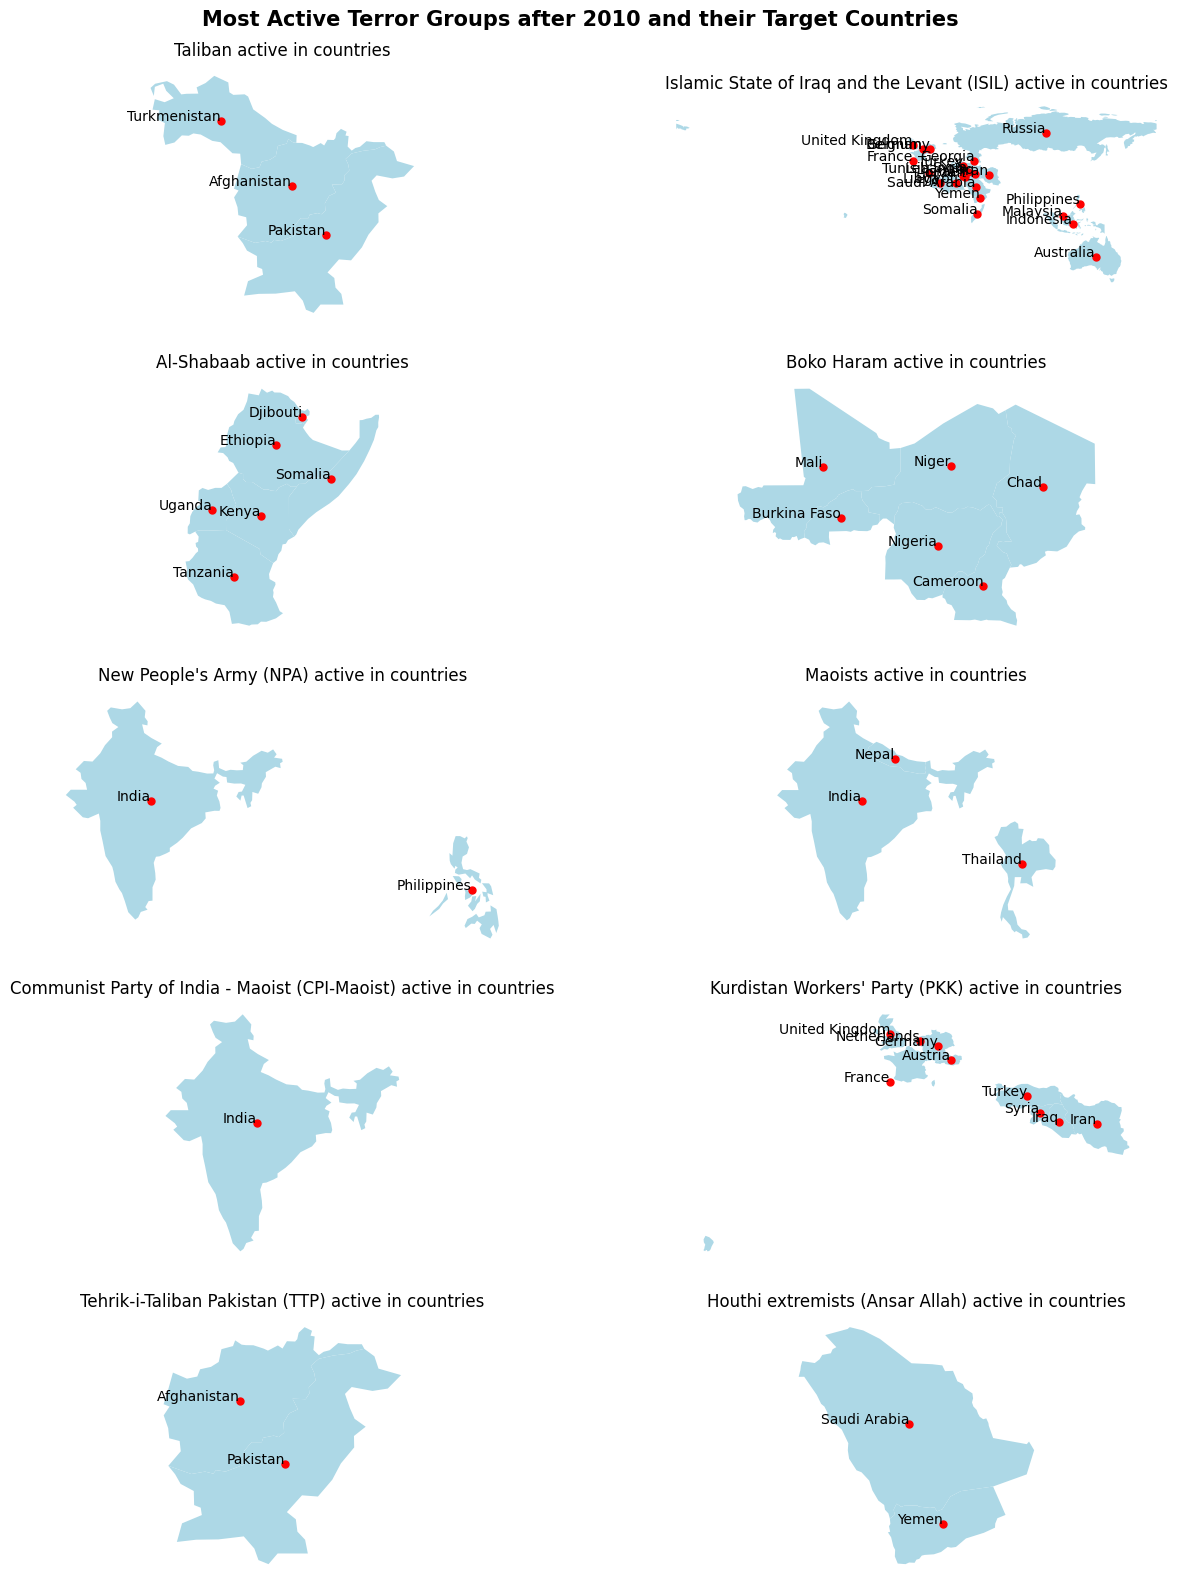

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a 5x2 grid of subplots for maps
fig, axs = plt.subplots(5, 2, figsize=(15, 18))
fig.suptitle("Most Active Terror Groups after 2010 and their Target Countries", fontweight='bold', fontsize=15)
fig.subplots_adjust(top=0.95)

for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        index = i * 2 + j
        if index < len(group_countries):
            group_names = list(group_countries.keys())
            group = group_names[index]
            countries = group_countries[group]
            group_map = world[world['name'].isin(countries)]

            # Plot the world map
            group_map.plot(ax=ax, color='lightblue')

            # Plot centroids as points for countries in the current group
            for idx, country in group_map.iterrows():
                centroid = country['geometry'].centroid
                ax.plot(centroid.x, centroid.y, 'o', color='red', markersize=5)
                ax.text(centroid.x, centroid.y, country['name'], fontsize=10, ha='right', va='baseline')

            ax.set_title(f'{group} active in countries')
            ax.axis('off')

plt.show()



##### 1. Why did you pick the specific chart?

Maps are excellent for showing geographical distribution, which helps in visualizing the countries targeted by these groups.

###### 2. What is/are the insight(s) found from the chart?

The major insights are as follows:


*   The targeted countries of Taliban are Turkmenistan, Afghanistan and Pakistan in recent years.
*   ISIL has attacked 25 countries around the globe in the last decade and can be considered most widespread terrorist organisation.
*   Al-Shabaab targeted east African countries like Ethiopia, Somalia, Uganda, Kenya, Tanzania and Djibouti.
*   Boko Haram is attacking Nigeria, Cameroon, Niger, Chad, Burkina Faso, and Mali in recent times.
*   New Peoples Army, a communist terror group, is mainly active in Phillipines. However they have also been involved in some attacks executed in India.
*   Maoists are responsible for conducting attacks in India, Nepal and Thailand.
*   CPI- Maoists operates in India.
*   Kurdistan Workers Party(PKK) conducts attacks in European countries like UK, Netherlands, Australia, Germany and France. They are also active in Middle Eastern countries like Turkey, Syria, Iraq and Iran.
*   Tehrik-i-Taliban Pakistan(TTP) conducts attacks in Afghanistan and Pakistan in recent years.
*    Houthi Extremists (Ansar Allah) has attacked Saudi Arabia and Yemen.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses might face challenges in expanding or investing in regions influenced by these groups. Political instability and security concerns could limit growth opportunities, leading to missed chances for expansion.

#### Chart - 14 - Correlation Heatmap

In [57]:
df.corr()

<ipython-input-57-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,eventid,Year,Month,Day,latitude,longitude,specificity,success,Killed,Wounded,extended,suicide,nperps,Property_Damages
eventid,1.000000,0.999996,0.002706,0.018336,0.166886,0.003907,0.030641,-0.082972,0.015351,0.015282,0.091761,0.137743,-0.137408,-0.278927
Year,0.999996,1.000000,0.000139,0.018254,0.166933,0.003917,0.030626,-0.082963,0.015341,0.015273,0.091754,0.137736,-0.137459,-0.278916
Month,0.002706,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003621,-0.002845,0.003463,0.002938,-0.000468,0.003071,0.014354,-0.005816
Day,0.018336,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.006991,-0.011802,-0.003693,-0.001268,-0.004700,0.003593,-0.013527,-0.003903
latitude,0.166886,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018811,-0.073715,-0.018124,0.015988,-0.024749,0.068682,-0.074284,-0.084537
longitude,0.003907,0.003917,-0.003880,-0.002285,0.001463,1.000000,0.001065,-0.000858,-0.000562,0.000223,0.000523,0.000486,-0.010808,-0.001231
specificity,0.030641,0.030626,0.003621,-0.006991,-0.018811,0.001065,1.000000,0.015301,0.022335,-0.015764,0.057897,-0.031921,-0.013259,0.028111
success,-0.082972,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,0.015301,1.000000,0.053115,0.025804,0.073233,-0.031155,0.011557,-0.036876
Killed,0.015351,0.015341,0.003463,-0.003693,-0.018124,-0.000562,0.022335,0.053115,1.000000,0.534375,0.027737,0.136086,0.025027,-0.016212
Wounded,0.015282,0.015273,0.002938,-0.001268,0.015988,0.000223,-0.015764,0.025804,0.534375,1.000000,-0.006627,0.099525,0.011773,-0.013406


<ipython-input-56-1c406959dda3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Reds',)  # 'g' for general formatting


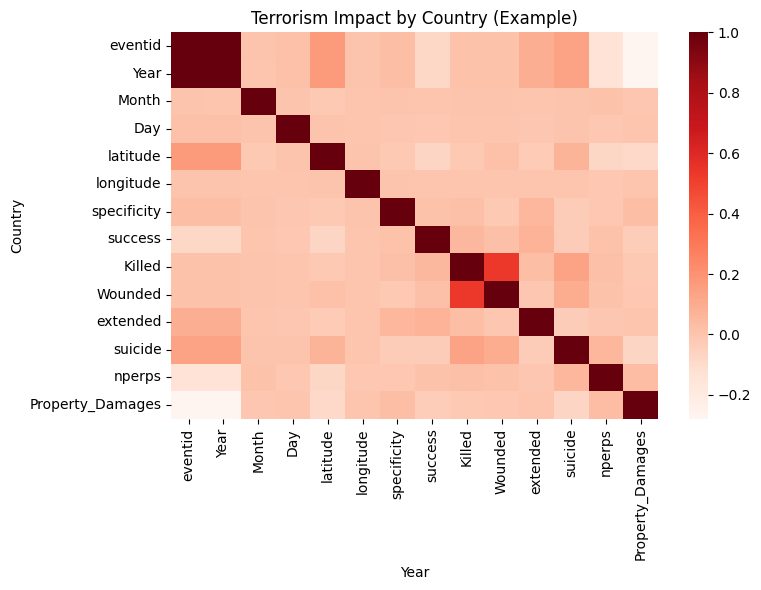

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='Reds',)  # 'g' for general formatting

plt.title('Terrorism Impact by Country (Example)')
plt.xlabel('Year')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***